# Build system to detect whether a person is in stress or not.

![Unknown.jpeg](attachment:Unknown.jpeg)

# Objective: -



The goal of this challenge is to build system to detect whether a person is in stress or not.

Stress, anxiety, and depression are threatening the mental health of people. Every person has a reason for having a stressful life. People often share their feelings on social media platforms like on Instagram in the form of posts and stories, and on Reddit in the form of asking for suggestions about their life on subreddits. In the past few years, many content creators have come forward to create content to help people with their mental health. Many organizations can use stress detection to find which social media users are stressed to help them quickly.




# Dataset: -

The dataset I am using for this task contains data posted on subreddits related to mental health. This dataset contains various mental health problems shared by people about their life. Fortunately, this dataset is labelled as 0 and 1, where 0 indicates no stress and 1 indicates stress. 

# Step 1: Import all the required libraries

- __Pandas__ : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series
- __Sklearn__ : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.
- __Pickle__ : Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
- __Seaborn__ : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- __Matplotlib__ : Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK.

In [ ]:
#Loading libraries 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sklearn.linear_model 
import sklearn
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.feature_extraction import text
from sklearn.metrics.pairwise import cosine_similarity
import warnings




warnings.filterwarnings('ignore')

# Step 2 : Read dataset and basic details of dataset
Goal:- In this step we are going to read the dataset, view the dataset and analysis the basic details like total number of rows and columns, what are the column data types and see to need to create new column or not.


In this stage we are going to read our problem dataset and have a look on it.

In [ ]:
#loading the dataset
try:
    df = pd.read_csv('/Users/amitpandey/Downloads/stress.csv') #Path for the file
    print('Data read done successfully...')
except (FileNotFoundError, IOError):
    print("Wrong file or file path") 
    


Data read done successfully...


In [ ]:
# To view the content inside the dataset we can use the head() method that returns a specified number of rows, string from the top. 
# The head() method returns the first 5 rows if a number is not specified.
df.head()

subreddit post_id sentence_range  \
0              ptsd  8601tu       (15, 20)   
1        assistance  8lbrx9         (0, 5)   
2              ptsd  9ch1zh       (15, 20)   
3     relationships  7rorpp        [5, 10]   
4  survivorsofabuse  9p2gbc         [0, 5]   

                                                text     id  label  \
0  He said he had not felt that way before, sugge...  33181      1   
1  Hey there r/assistance, Not sure if this is th...   2606      0   
2  My mom then hit me with the newspaper and it s...  38816      1   
3  until i met my new boyfriend, he is amazing, h...    239      1   
4  October is Domestic Violence Awareness Month a...   1421      1   

   confidence  social_timestamp  social_karma  syntax_ari  ...  \
0         0.8        1521614353             5    1.806818  ...   
1         1.0        1527009817             4    9.429737  ...   
2         0.8        1535935605             2    7.769821  ...   
3         0.6        1516429555             0    2.667798  ...   
4         0.8        1539809005            24    7.554238  ...   

   lex_dal_min_pleasantness  lex_dal_min_activation  lex_dal_min_imagery  \
0                     1.000                  1.1250                  1.0   
1                     1.125                  1.0000                  1.0   
2                     1.000                  1.1429                  1.0   
3                     1.000                  1.1250                  1.0   
4                     1.000                  1.1250                  1.0   

   lex_dal_avg_activation  lex_dal_avg_imagery  lex_dal_avg_pleasantness  \
0                 1.77000              1.52211                   1.89556   
1                 1.69586              1.62045                   1.88919   
2                 1.83088              1.58108                   1.85828   
3                 1.75356              1.52114                   1.98848   
4                 1.77644              1.64872                   1.81456   

   social_upvote_ratio  social_num_comments  syntax_fk_grade  sentiment  
0                 0.86                    1         3.253573  -0.002742  
1                 0.65                    2         8.828316   0.292857  
2                 0.67                    0         7.841667   0.011894  
3                 0.50                    5         4.104027   0.141671  
4                 1.00                    1         7.910952  -0.204167  

[5 rows x 116 columns]

# Step3: Data Preprocessing

**Why need of Data Preprocessing?**

Preprocessing data is an important step for data analysis. The following are some benefits of preprocessing data:

 - It improves accuracy and reliability. Preprocessing data removes missing or inconsistent data values resulting from human or computer error, which can improve the accuracy and quality of a dataset, making it more reliable.
 - It makes data consistent. When collecting data, it's possible to have data duplicates, and discarding them during preprocessing can ensure the data values for analysis are consistent, which helps produce accurate results.
 - It increases the data's algorithm readability. Preprocessing enhances the data's quality and makes it easier for machine learning algorithms to read, use, and interpret it.

After we read the data, we can look at the data using:

In [ ]:
# count the total number of rows and columns.
print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The train data has 2838 rows and 116 columns


#### The df.value_counts() method counts the number of types of values a particular column contains. 

In [ ]:
df.shape

(2838, 116)

#### The df.shape method shows the shape of the dataset. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Columns: 116 entries, subreddit to sentiment
dtypes: float64(106), int64(6), object(4)
memory usage: 2.5+ MB


#### The df.info() method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage. 

In [ ]:
df.iloc[1]

subreddit                                                          assistance
post_id                                                                8lbrx9
sentence_range                                                         (0, 5)
text                        Hey there r/assistance, Not sure if this is th...
id                                                                       2606
                                                  ...                        
lex_dal_avg_pleasantness                                              1.88919
social_upvote_ratio                                                      0.65
social_num_comments                                                         2
syntax_fk_grade                                                      8.828316
sentiment                                                            0.292857
Name: 1, Length: 116, dtype: object

####  df.iloc[ ] is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array. The iloc property gets, or sets, the value(s) of the specified indexes.

### Data Type Check for every column

**Why data type check is required?**

Data type check helps us with understanding what type of variables our dataset contains. It helps us with identifying whether to keep that variable or not. If the dataset contains contiguous data, then only float and integer type variables will be beneficial and if we have to classify any value then categorical variables will be beneficial.

In [ ]:
objects_cols = ['object']
objects_lst = list(df.select_dtypes(include=objects_cols).columns)

In [ ]:
print("Total number of categorical columns are ", len(objects_lst))
print("There names are as follows: ", objects_lst)

Total number of categorical columns are  4
There names are as follows:  ['subreddit', 'post_id', 'sentence_range', 'text']


In [ ]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)

In [ ]:
print("Total number of numerical columns are ", len(int64_lst))
print("There names are as follows: ", int64_lst)

Total number of numerical columns are  6
There names are as follows:  ['id', 'label', 'social_timestamp', 'social_karma', 'lex_liwc_WC', 'social_num_comments']


In [ ]:
float64_cols = ['float64']
float64_lst = list(df.select_dtypes(include=float64_cols).columns)

In [ ]:
print("Total number of float64 columns are ", len(float64_lst))
print("There name are as follow: ", float64_lst)

Total number of float64 columns are  106
There name are as follow:  ['confidence', 'syntax_ari', 'lex_liwc_Analytic', 'lex_liwc_Clout', 'lex_liwc_Authentic', 'lex_liwc_Tone', 'lex_liwc_WPS', 'lex_liwc_Sixltr', 'lex_liwc_Dic', 'lex_liwc_function', 'lex_liwc_pronoun', 'lex_liwc_ppron', 'lex_liwc_i', 'lex_liwc_we', 'lex_liwc_you', 'lex_liwc_shehe', 'lex_liwc_they', 'lex_liwc_ipron', 'lex_liwc_article', 'lex_liwc_prep', 'lex_liwc_auxverb', 'lex_liwc_adverb', 'lex_liwc_conj', 'lex_liwc_negate', 'lex_liwc_verb', 'lex_liwc_adj', 'lex_liwc_compare', 'lex_liwc_interrog', 'lex_liwc_number', 'lex_liwc_quant', 'lex_liwc_affect', 'lex_liwc_posemo', 'lex_liwc_negemo', 'lex_liwc_anx', 'lex_liwc_anger', 'lex_liwc_sad', 'lex_liwc_social', 'lex_liwc_family', 'lex_liwc_friend', 'lex_liwc_female', 'lex_liwc_male', 'lex_liwc_cogproc', 'lex_liwc_insight', 'lex_liwc_cause', 'lex_liwc_discrep', 'lex_liwc_tentat', 'lex_liwc_certain', 'lex_liwc_differ', 'lex_liwc_percept', 'lex_liwc_see', 'lex_liwc_hear', 'lex_

## Step 2 Insights: -

1) We have total 116 features where 106 of them are float type, 4 are object type and 6 is int type.

After this step we have to calculate various evaluation parameters which will help us in cleaning and analysing the data more accurately.

# Step 3: Descriptive Analysis

**Goal/Purpose:**  Finding the data distribution of the features. Visualization helps to understand data and also to explain the data to another person.

Things we are going to do in this step:

1. Mean
2. Median
3. Mode
4. Standard Deviation
5. Variance
6. Null Values
7. NaN Values
8. Min value
9. Max value
10. Count Value
11. Quatilers
12. Correlation
13. Skewness

In [ ]:
df.describe()

id        label   confidence  social_timestamp  social_karma  \
count   2838.000000  2838.000000  2838.000000      2.838000e+03   2838.000000   
mean   13751.999295     0.524313     0.808972      1.518107e+09     18.262156   
std    17340.161897     0.499497     0.177038      1.552209e+07     79.419166   
min        4.000000     0.000000     0.428571      1.483274e+09      0.000000   
25%      926.250000     0.000000     0.600000      1.509698e+09      2.000000   
50%     1891.500000     1.000000     0.800000      1.517066e+09      5.000000   
75%    25473.750000     1.000000     1.000000      1.530898e+09     10.000000   
max    55757.000000     1.000000     1.000000      1.542592e+09   1435.000000   

        syntax_ari  lex_liwc_WC  lex_liwc_Analytic  lex_liwc_Clout  \
count  2838.000000  2838.000000        2838.000000     2838.000000   
mean      4.684272    85.996124          35.240941       40.948231   
std       3.316435    32.334887          26.486189       31.587117   
min      -6.620000     5.000000           1.000000        1.000000   
25%       2.464243    65.000000          12.410000       12.135000   
50%       4.321886    81.000000          29.420000       33.520000   
75%       6.505657   101.000000          55.057500       69.320000   
max      24.074231   310.000000          99.000000       99.000000   

       lex_liwc_Authentic  ...  lex_dal_min_pleasantness  \
count         2838.000000  ...               2838.000000   
mean            67.044249  ...                  1.088001   
std             32.880644  ...                  0.117159   
min              1.000000  ...                  1.000000   
25%             41.070000  ...                  1.000000   
50%             80.710000  ...                  1.000000   
75%             96.180000  ...                  1.142900   
max             99.000000  ...                  1.900000   

       lex_dal_min_activation  lex_dal_min_imagery  lex_dal_avg_activation  \
count             2838.000000          2838.000000             2838.000000   
mean                 1.120099             1.000211                1.722759   
std                  0.085227             0.006500                0.047835   
min                  1.000000             1.000000                1.485400   
25%                  1.000000             1.000000                1.691430   
50%                  1.142900             1.000000                1.721430   
75%                  1.142900             1.000000                1.751760   
max                  1.500000             1.200000                2.007400   

       lex_dal_avg_imagery  lex_dal_avg_pleasantness  social_upvote_ratio  \
count          2838.000000               2838.000000          2838.000000   
mean              1.536400                  1.879385             0.843517   
std               0.102971                  0.058932             0.174794   
min               1.200000                  1.561150             0.140000   
25%               1.469745                  1.841782             0.750000   
50%               1.530295                  1.878250             0.890000   
75%               1.596030                  1.916243             1.000000   
max               2.066670                  2.158490             1.000000   

       social_num_comments  syntax_fk_grade    sentiment  
count          2838.000000      2838.000000  2838.000000  
mean              9.948555         5.448836     0.040740  
std              21.798032         2.535829     0.195490  
min               0.000000        -1.918000    -1.000000  
25%               2.000000         3.729973    -0.072222  
50%               5.000000         5.210000     0.044821  
75%              10.000000         6.855217     0.166667  
max             416.000000        21.198919     1.000000  

[8 rows x 112 columns]

#### The df.describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value. 

# Measure the variability of data of the dataset

Variability describes how far apart data points lie from each other and from the center of a distribution.

# 1. Standard Deviation

![Standard-Deviation-ADD-SOURCE-e838b9dcfb89406e836ccad58278f4cd.jpg](attachment:Standard-Deviation-ADD-SOURCE-e838b9dcfb89406e836ccad58278f4cd.jpg)

The standard deviation is the average amount of variability in your dataset.

It tells you, on average, how far each data point lies from the mean. The larger the standard deviation, the more variable the data set is and if zero variance then there is no variability in the dataset that means there no use of that dataset.


So, it helps in understanding the measurements when the data is distributed. The more the data is distributed, the greater will be the standard deviation of that data.Here, you as an individual can determine which company is beneficial in long term. But, if you didn't know the SD you would have choosen a wrong compnay for you.

In [ ]:
df.std()

id                          1.734016e+04
label                       4.994965e-01
confidence                  1.770383e-01
social_timestamp            1.552209e+07
social_karma                7.941917e+01
                                ...     
lex_dal_avg_pleasantness    5.893169e-02
social_upvote_ratio         1.747940e-01
social_num_comments         2.179803e+01
syntax_fk_grade             2.535829e+00
sentiment                   1.954901e-01
Length: 112, dtype: float64

#### We can also understand the standard deviation using the below function. 

In [ ]:
def std_cal(df,float64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].std(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    std_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return std_total_df

In [ ]:
std_cal(df, float64_lst)

normal_value  zero_value
0           106           0

In [ ]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)
std_cal(df,int64_lst)

normal_value  zero_value
0             6           0

zero_value -> is the zero variance and when then there is no variability in the dataset that means there no use of that dataset.



# 2. Variance

The variance is the average of squared deviations from the mean. A deviation from the mean is how far a score lies from the mean.

Variance is the square of the standard deviation. This means that the units of variance are much larger than those of a typical value of a data set.

![0_5NGAJWo_3-DsLKoV.png](attachment:0_5NGAJWo_3-DsLKoV.png)

![Variance-TAERM-ADD-Source-464952914f77460a8139dbf20e14f0c0.jpg](attachment:Variance-TAERM-ADD-Source-464952914f77460a8139dbf20e14f0c0.jpg)

#### Why do we used Variance ?

By Squairng the number we get non-negative computation i.e. Disperson cannot be negative.
The presence of variance is very important in your dataset because this will allow the model to learn about the different patterns hidden in the data

In [ ]:
df.var()

id                          3.006812e+08
label                       2.494968e-01
confidence                  3.134258e-02
social_timestamp            2.409353e+14
social_karma                6.307404e+03
                                ...     
lex_dal_avg_pleasantness    3.472945e-03
social_upvote_ratio         3.055294e-02
social_num_comments         4.751542e+02
syntax_fk_grade             6.430429e+00
sentiment                   3.821639e-02
Length: 112, dtype: float64

#### We can also understand the Variance using the below function.

In [ ]:
zero_cols = []

def var_cal(df,float64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].var(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
            zero_cols.append(value)
    
    var_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return var_total_df

In [ ]:
var_cal(df, float64_lst)

normal_value  zero_value
0           106           0

In [ ]:
var_cal(df, int64_lst)

normal_value  zero_value
0             6           0

zero_value -> Zero variance means that there is no difference in the data values, which means that they are all the same.

# Measure central tendency

A measure of central tendency is a single value that attempts to describe a set of data by identifying the central position within that set of data. As such, measures of central tendency are sometimes called measures of central location. They are also classed as summary statistics.



Mean - The average value. Median - The mid point value. Mode - The most common value.

# 1. Mean

![1_tjAEMZx_0uIYGUhxEnPXPw.png](attachment:1_tjAEMZx_0uIYGUhxEnPXPw.png)

The mean is the arithmetic average, and it is probably the measure of central tendency that you are most familiar.

#### Why do we calculate mean?




The mean is used to summarize a data set. It is a measure of the center of a data set.


In [ ]:
df.mean()

id                          1.375200e+04
label                       5.243129e-01
confidence                  8.089718e-01
social_timestamp            1.518107e+09
social_karma                1.826216e+01
                                ...     
lex_dal_avg_pleasantness    1.879385e+00
social_upvote_ratio         8.435166e-01
social_num_comments         9.948555e+00
syntax_fk_grade             5.448836e+00
sentiment                   4.074022e-02
Length: 112, dtype: float64

#### We can also understand the mean using the below function. 

In [ ]:
def mean_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    mean_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return mean_total_df

In [ ]:
mean_cal(df, int64_lst)

normal_value  zero_value
0             6           0

In [ ]:
mean_cal(df,float64_lst)

normal_value  zero_value
0           106           0

zero_value -> that the mean of a paticular column is zero, which isn't usefull in anyway and need to be drop.

# 2.Median
![Alg1_14_02_0011-diagram_thumb-lg.png](attachment:Alg1_14_02_0011-diagram_thumb-lg.png)

The median is the middle value. It is the value that splits the dataset in half.The median of a dataset is the value that, assuming the dataset is ordered from smallest to largest, falls in the middle. If there are an even number of values in a dataset, the middle two values are the median.

#### Why do we calculate median ?

By comparing the median to the mean, you can get an idea of the distribution of a dataset. When the mean and the median are the same, the dataset is more or less evenly distributed from the lowest to highest values.The median will depict that the patient below median is Malignent and above that are Benign.

In [ ]:
df.median()

id                          1.891500e+03
label                       1.000000e+00
confidence                  8.000000e-01
social_timestamp            1.517066e+09
social_karma                5.000000e+00
                                ...     
lex_dal_avg_pleasantness    1.878250e+00
social_upvote_ratio         8.900000e-01
social_num_comments         5.000000e+00
syntax_fk_grade             5.210000e+00
sentiment                   4.482143e-02
Length: 112, dtype: float64

####  We can also understand the median using the below function. 

In [ ]:
def median_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    median_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return median_total_df

In [ ]:
median_cal(df, float64_lst)

normal_value  zero_value
0           106           0

In [ ]:
median_cal(df, int64_lst)

normal_value  zero_value
0             6           0

zero_value -> that the median of a paticular column is zero which isn't usefull in anyway and need to be drop.

# 3. Mode
![Mode-1.png.webp](attachment:Mode-1.png.webp)
The mode is the value that occurs the most frequently in your data set. On a bar chart, the mode is the highest bar. If the data have multiple values that are tied for occurring the most frequently, you have a multimodal distribution. If no value repeats, the data do not have a mode.

#### Why do we calculate mode ?

The mode can be used to summarize categorical variables, while the mean and median can be calculated only for numeric variables. This is the main advantage of the mode as a measure of central tendency. It's also useful for discrete variables and for continuous variables when they are expressed as intervals.

In [ ]:
df.mode()

subreddit post_id sentence_range  \
0         ptsd  7o5n2d         (0, 5)   
1          NaN  9md6qz            NaN   
2          NaN     NaN            NaN   
3          NaN     NaN            NaN   
4          NaN     NaN            NaN   
...        ...     ...            ...   
2833       NaN     NaN            NaN   
2834       NaN     NaN            NaN   
2835       NaN     NaN            NaN   
2836       NaN     NaN            NaN   
2837       NaN     NaN            NaN   

                                                   text     id  label  \
0                                                #NAME?      4    1.0   
1     Hello, You are invited to complete a survey fo...      5    NaN   
2                                                   NaN      6    NaN   
3                                                   NaN      7    NaN   
4                                                   NaN      8    NaN   
...                                                 ...    ...    ...   
2833                                                NaN  55416    NaN   
2834                                                NaN  55419    NaN   
2835                                                NaN  55670    NaN   
2836                                                NaN  55699    NaN   
2837                                                NaN  55757    NaN   

      confidence  social_timestamp  social_karma  syntax_ari  ...  \
0            1.0      1.515097e+09           1.0         0.0  ...   
1            NaN      1.538989e+09           NaN         NaN  ...   
2            NaN               NaN           NaN         NaN  ...   
3            NaN               NaN           NaN         NaN  ...   
4            NaN               NaN           NaN         NaN  ...   
...          ...               ...           ...         ...  ...   
2833         NaN               NaN           NaN         NaN  ...   
2834         NaN               NaN           NaN         NaN  ...   
2835         NaN               NaN           NaN         NaN  ...   
2836         NaN               NaN           NaN         NaN  ...   
2837         NaN               NaN           NaN         NaN  ...   

      lex_dal_min_pleasantness  lex_dal_min_activation  lex_dal_min_imagery  \
0                          1.0                  1.1429                  1.0   
1                          NaN                     NaN                  NaN   
2                          NaN                     NaN                  NaN   
3                          NaN                     NaN                  NaN   
4                          NaN                     NaN                  NaN   
...                        ...                     ...                  ...   
2833                       NaN                     NaN                  NaN   
2834                       NaN                     NaN                  NaN   
2835                       NaN                     NaN                  NaN   
2836                       NaN                     NaN                  NaN   
2837                       NaN                     NaN                  NaN   

      lex_dal_avg_activation  lex_dal_avg_imagery  lex_dal_avg_pleasantness  \
0                    1.70118                  1.6                   1.86595   
1                    1.73417                  NaN                       NaN   
2                        NaN                  NaN                       NaN   
3                        NaN                  NaN                       NaN   
4                        NaN                  NaN                       NaN   
...                      ...                  ...                       ...   
2833                     NaN                  NaN                       NaN   
2834                     NaN                  NaN                       NaN   
2835                     NaN                  NaN                       NaN   
2836                     NaN                  NaN                  

In [ ]:
def mode_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value', 'string_value']
    zero_value = 0
    normal_value = 0
    string_value = 0
    
    for value in int64_lst:
                
        rs = df[value].mode()[0]
        
        if isinstance(rs, str):
            string_value = string_value + 1
        else:

            if rs > 0:
                normal_value = normal_value + 1

            elif rs == 0:
                zero_value = zero_value + 1
    
    mode_total_df =  pd.DataFrame([[normal_value, zero_value, string_value]], columns=cols) 
    
    return mode_total_df

In [ ]:
mode_cal(df, list(df.columns))

normal_value  zero_value  string_value
0            36          76             4

zero_value -> that the mode of a paticular column is zero which isn't usefull in anyway and need to be drop.

# Null and Nan values

1. **Null Values**


![missing-values.png](attachment:missing-values.png)

A null value in a relational database is used when the value in a column is unknown or missing. A null is neither an empty string (for character or datetime data types) nor a zero value (for numeric data types).

In [ ]:
df.isnull().sum()

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

As we notice that there are null values in our dataset.


2. **Nan Values**

![images.png](attachment:images.png)

NaN, standing for Not a Number, is a member of a numeric data type that can be interpreted as a value that is undefined or unrepresentable, especially in floating-point arithmetic.

In [ ]:
df.isna().sum()

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

### As we notice that there are nan values in our dataset. 

In [ ]:
# We have many ways to fill Null/Nan Values as below:

* mean -> average value (for numerical)
* mode -> most repeated value (for categorical)

#### Another way to remove null and nan values is to use the method "df.dropna(inplace=True)". 

# Count of unique occurences of every value in all categorical value



In [ ]:
for value in objects_lst:
    
    print(f"{value:{10}} {df[value].value_counts()}")

subreddit  ptsd                584
relationships       552
anxiety             503
domesticviolence    316
assistance          289
survivorsofabuse    245
homeless            168
almosthomeless       80
stress               64
food_pantry          37
Name: subreddit, dtype: int64
post_id    9md6qz    6
7o5n2d    6
7nnu34    5
7r6fsr    5
6yq1rh    5
         ..
80k6cw    1
7k47ii    1
98gr4f    1
8tjra2    1
5y25cl    1
Name: post_id, Length: 2343, dtype: int64
sentence_range (0, 5)        337
[0, 5]        334
[5, 10]       260
(5, 10)       215
[10, 15]      162
             ... 
(82, 87)        1
[68, 73]        1
[140, 145]      1
(36, 41)        1
[76, 81]        1
Name: sentence_range, Length: 173, dtype: int64
text       Hello, You are invited to complete a survey for a WMU psychology department research project designed to assess treatment preferences among adults seeking treatment for a variety of concerns. We hope to learn if and how preferences for treatment change over time

- Categorical data are variables that contain label values rather than numeric values.The number of possible values is often limited to a fixed set.
- Use Label Encoder to label the categorical data. Label Encoder is the part of SciKit Learn library in Python and used to convert categorical data, or text data, into numbers, which our predictive models can better understand.



__Label Encoding__ refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

### So this dataset does not have any null values. Now let’s prepare the text column of this dataset to clean the text column with stopwords, links, special symbols and language errors:



In [ ]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df["text"] = df["text"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amitpandey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df

subreddit post_id sentence_range  \
0                 ptsd  8601tu       (15, 20)   
1           assistance  8lbrx9         (0, 5)   
2                 ptsd  9ch1zh       (15, 20)   
3        relationships  7rorpp        [5, 10]   
4     survivorsofabuse  9p2gbc         [0, 5]   
...                ...     ...            ...   
2833     relationships  7oee1t       [35, 40]   
2834              ptsd  9p4ung       [20, 25]   
2835           anxiety  9nam6l        (5, 10)   
2836    almosthomeless  5y53ya        [5, 10]   
2837              ptsd  5y25cl         [0, 5]   

                                                   text     id  label  \
0     said felt way sugget go rest trigger ahead you...  33181      1   
1     hey rassist sure right place post goe  im curr...   2606      0   
2     mom hit newspap shock would know dont like pla...  38816      1   
3     met new boyfriend amaz kind sweet good student...    239      1   
4     octob domest violenc awar month domest violenc...   1421      1   
...                                                 ...    ...    ...   
2833   week ago precious ignor  jan  happi year prec...   1713      0   
2834  dont abil cope anymor im tri lot thing trigger...   1133      1   
2835  case first time your read post look peopl will...  10442      0   
2836  find normal good relationship main problem see...   1834      0   
2837  talk mom morn said sister trauma wors mine did...    961      1   

      confidence  social_timestamp  social_karma  syntax_ari  ...  \
0       0.800000        1521614353             5    1.806818  ...   
1       1.000000        1527009817             4    9.429737  ...   
2       0.800000        1535935605             2    7.769821  ...   
3       0.600000        1516429555             0    2.667798  ...   
4       0.800000        1539809005            24    7.554238  ...   
...          ...               ...           ...         ...  ...   
2833    1.000000        1515187044            13   -1.369333  ...   
2834    1.000000        1539827412            33    9.425478  ...   
2835    1.000000        1539269312             2   11.060675  ...   
2836    0.571429        1488938143             4    2.421912  ...   
2837    0.571429        1488909516             2    0.835254  ...   

      lex_dal_min_pleasantness  lex_dal_min_activation  lex_dal_min_imagery  \
0                       1.0000                  1.1250                  1.0   
1                       1.1250                  1.0000                  1.0   
2                       1.0000                  1.1429                  1.0   
3                       1.0000                  1.1250                  1.0   
4                       1.0000                  1.1250                  1.0   
...                        ...                     ...                  ...   
2833                    1.4000                  1.0000                  1.0   
2834                    1.0000                  1.0000                  1.0   
2835                    1.1250                  1.1250                  1.0   
2836                    1.1111                  1.1429                  1.0   
2837                    1.0000                  1.0000                  1.0   

      lex_dal_avg_activation  lex_dal_avg_imagery  lex_dal_avg_pleasantness  \
0                    1.77000              1.52211                   1.89556   
1                    1.69586              1.62045                   1.88919   
2                    1.83088              1.58108                   1.85828   
3                    1.75356              1.52114                   1.98848   
4                    1.77644              1.64872                   1.81456   
...                      ...                  ...                       ...   
2833                 1.71133              1.45301                   2.00304   
2834                 1.65003              1.56842                   1.81527   
2835                 1.79768              1.49074         

### Now let’s have a look at the most used words by the people sharing about their life problems on social media by visualizing a word cloud of the text column:

In [ ]:
#pip install wordcloud


# Skewness 

![Skewness_1.png.webp](attachment:Skewness_1.png.webp)

Skewness is a measure of the asymmetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images. A distribution can have right (or positive), left (or negative), or zero skewness

#### Why do we calculate Skewness ?

Skewness gives the direction of the outliers if it is right-skewed, most of the outliers are present on the right side of the distribution while if it is left-skewed, most of the outliers will present on the left side of the distribution

#### Below is the function to calculate skewness. 

In [ ]:
def right_nor_left(df, int64_lst):
    
    temp_skewness = ['column', 'skewness_value', 'skewness (+ve or -ve)']
    temp_skewness_values  = []
    
    temp_total = ["positive (+ve) skewed", "normal distrbution" , "negative (-ve) skewed"]
    positive = 0
    negative = 0
    normal = 0
    
    for value in int64_lst:
    
        rs = round(df[value].skew(),4)

        if rs > 0:
            temp_skewness_values.append([value,rs , "positive (+ve) skewed"])   
            positive = positive + 1

        elif rs == 0:
            temp_skewness_values.append([value,rs,"normal distrbution"])
            normal = normal + 1

        elif rs < 0:
            temp_skewness_values.append([value,rs, "negative (-ve) skewed"])
            negative = negative + 1
    
    skewness_df =  pd.DataFrame(temp_skewness_values, columns=temp_skewness) 
    skewness_total_df =  pd.DataFrame([[positive, normal, negative]], columns=temp_total) 
    
    return skewness_df, skewness_total_df

In [ ]:
float64_cols = ['float64','int64']
float64_lst_col = list(df.select_dtypes(include=float64_cols).columns)

skew_df,skew_total_df = right_nor_left(df, float64_lst_col)

In [ ]:
skew_df

column  skewness_value  skewness (+ve or -ve)
0                          id          1.0482  positive (+ve) skewed
1                       label         -0.0974  negative (-ve) skewed
2                  confidence         -0.1865  negative (-ve) skewed
3            social_timestamp         -0.3923  negative (-ve) skewed
4                social_karma         11.6972  positive (+ve) skewed
..                        ...             ...                    ...
107  lex_dal_avg_pleasantness          0.0312  positive (+ve) skewed
108       social_upvote_ratio         -1.1777  negative (-ve) skewed
109       social_num_comments          9.1816  positive (+ve) skewed
110           syntax_fk_grade          0.7789  positive (+ve) skewed
111                 sentiment         -0.2949  negative (-ve) skewed

[112 rows x 3 columns]

In [ ]:
skew_total_df

positive (+ve) skewed  normal distrbution  negative (-ve) skewed
0                     98                   0                     14

We notice with the above results that we have following details:
1. 98 columns are positive skewed & 14 column is negative skewed.



### Step 3 Insights: - 

With the statistical analysis we have found that the data have 98 columns with +ve skewness & 14 columns have -ve skewness.

Statistical analysis is little difficult to understand at one glance so to make it more understandable we will perform visulatization on the data which will help us to understand the process easily.

### Why we are calculating all these metrics? 

Mean / Median /Mode/ Variance /Standard Deviation are all very basic but very important concept of statistics used in data science. Almost all the machine learning algorithm uses these concepts in data preprocessing steps. These concepts are part of descriptive statistics where we basically used to describe and understand the data for features in Machine learning

# Step 4: Data Exploration
**Goal/Purpose:**

Graphs we are going to develop in this step

1. Histogram of all columns to check the distrubution of the columns
2. Distplot or distribution plot of all columns to check the variation in the data distribution
3. Heatmap to calculate correlation within feature variables
4. Boxplot to find out outlier in the feature columns
5. WorldCloud to viualize the most no of words used



# 1. Histogram

A histogram is a bar graph-like representation of data that buckets a range of classes into columns along the horizontal x-axis.The vertical y-axis represents the number count or percentage of occurrences in the data for each column

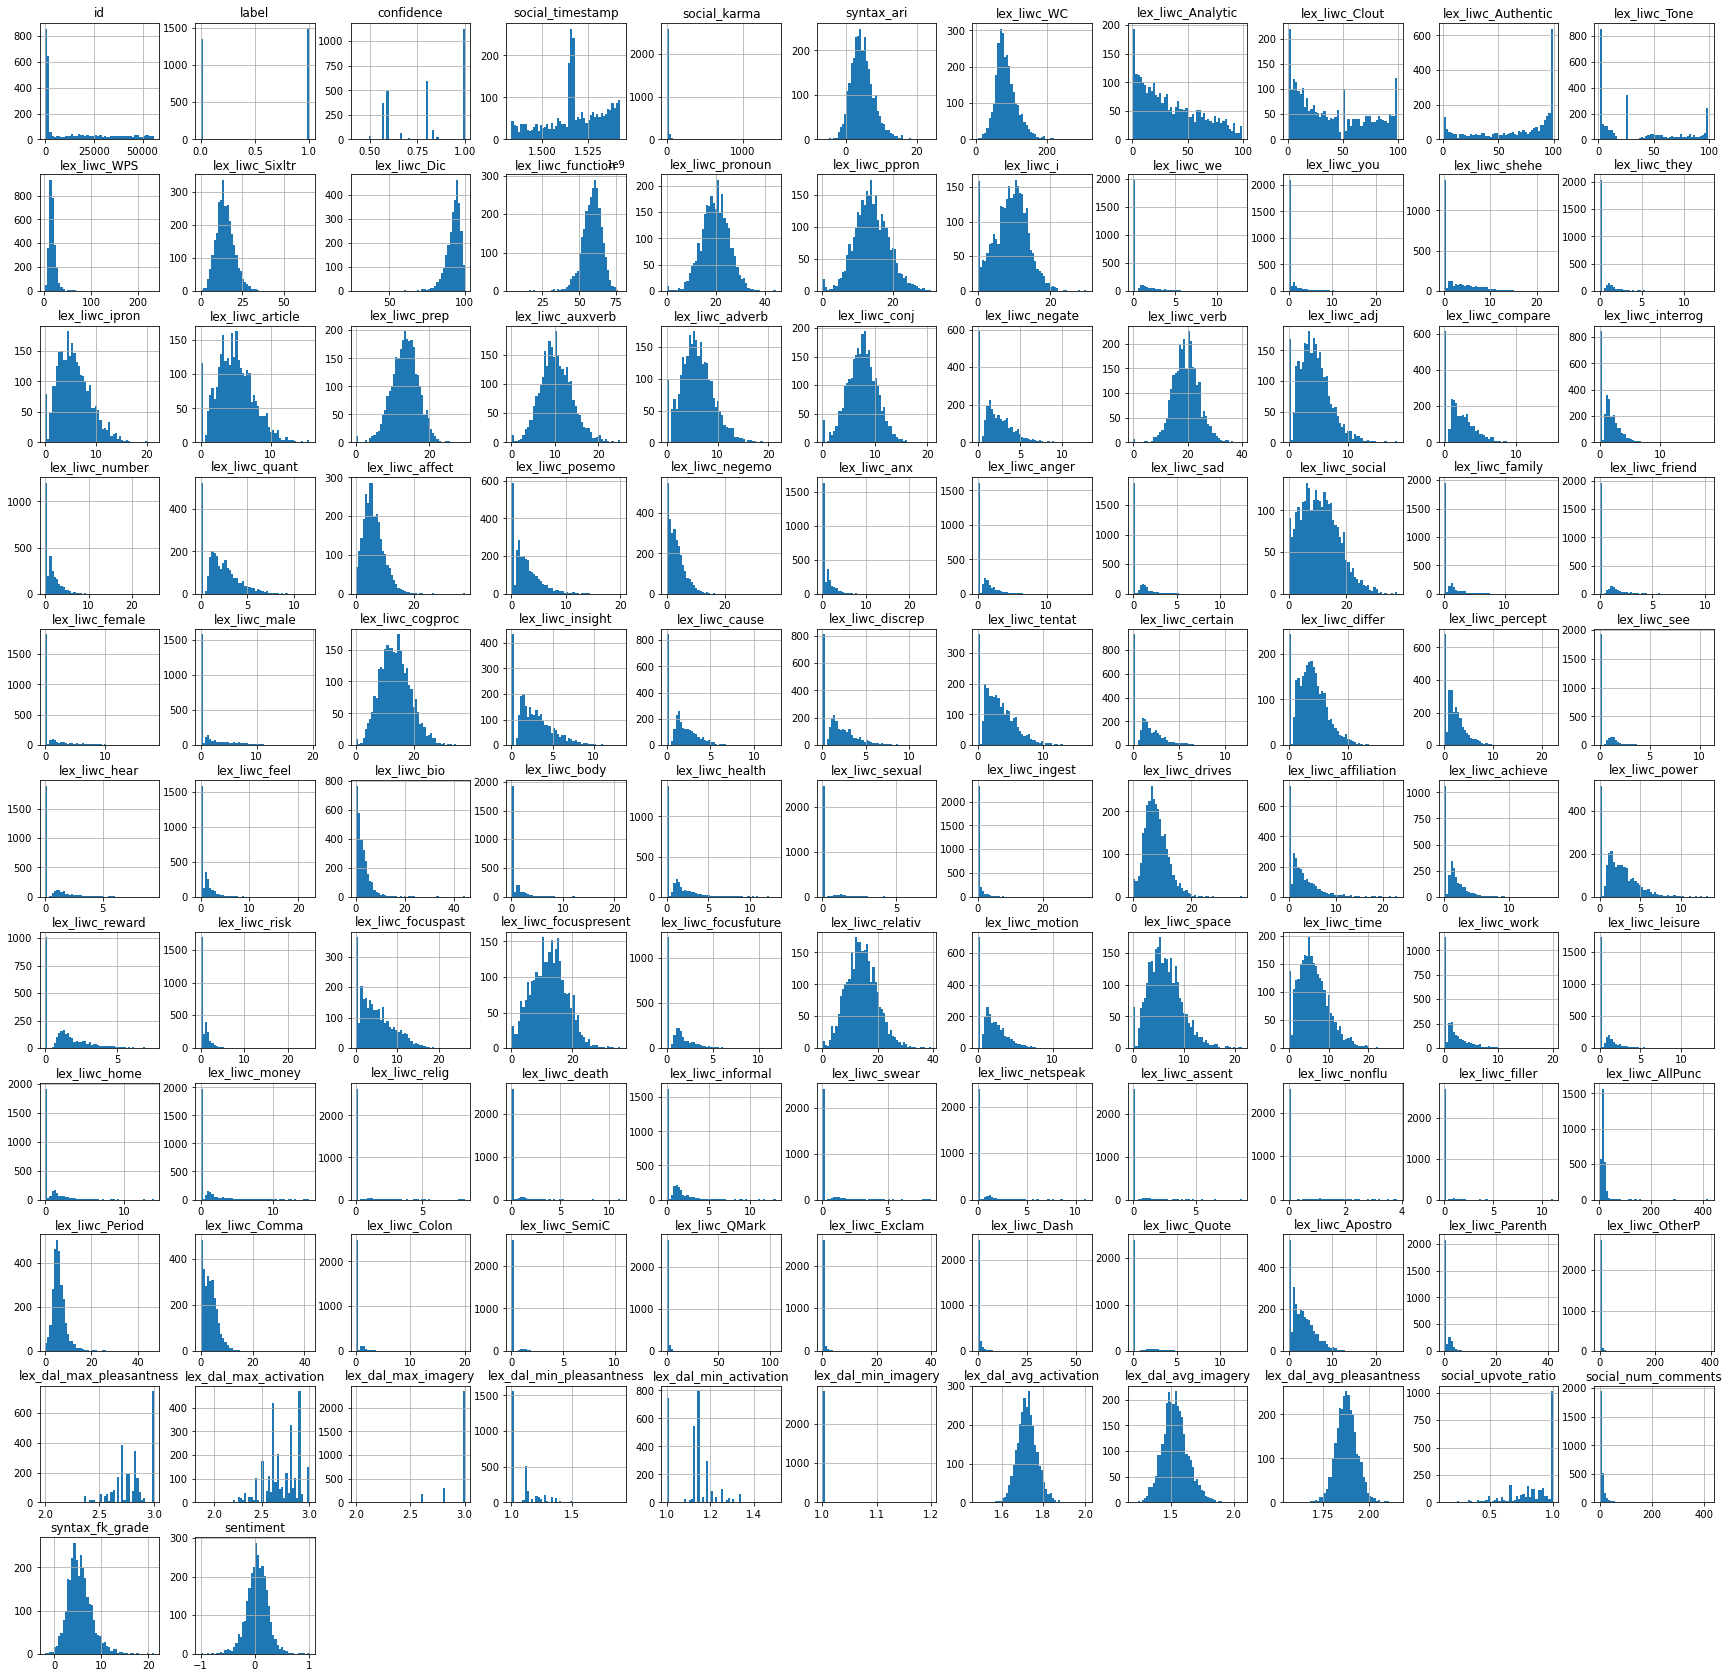

In [ ]:
# Distribution in attributes
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(30,30))
plt.show()


### Histogram Insight: -

Histogram helps in identifying the following:
- View the shape of your data set’s distribution to look for outliers or other significant data points.

- Determine whether something significant has boccurred from one time period to another.

### Why Histogram? 

It is used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

From the above graphical representation we can identify that the highest bar represents the outliers which is above the maximum range.

We can also identify that the values are moving on the right side, which determines positive and the centered values determines normal skewness.

# 2. Distplot

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables. The Seaborn module along with the Matplotlib module is used to depict the distplot with different variations in it 

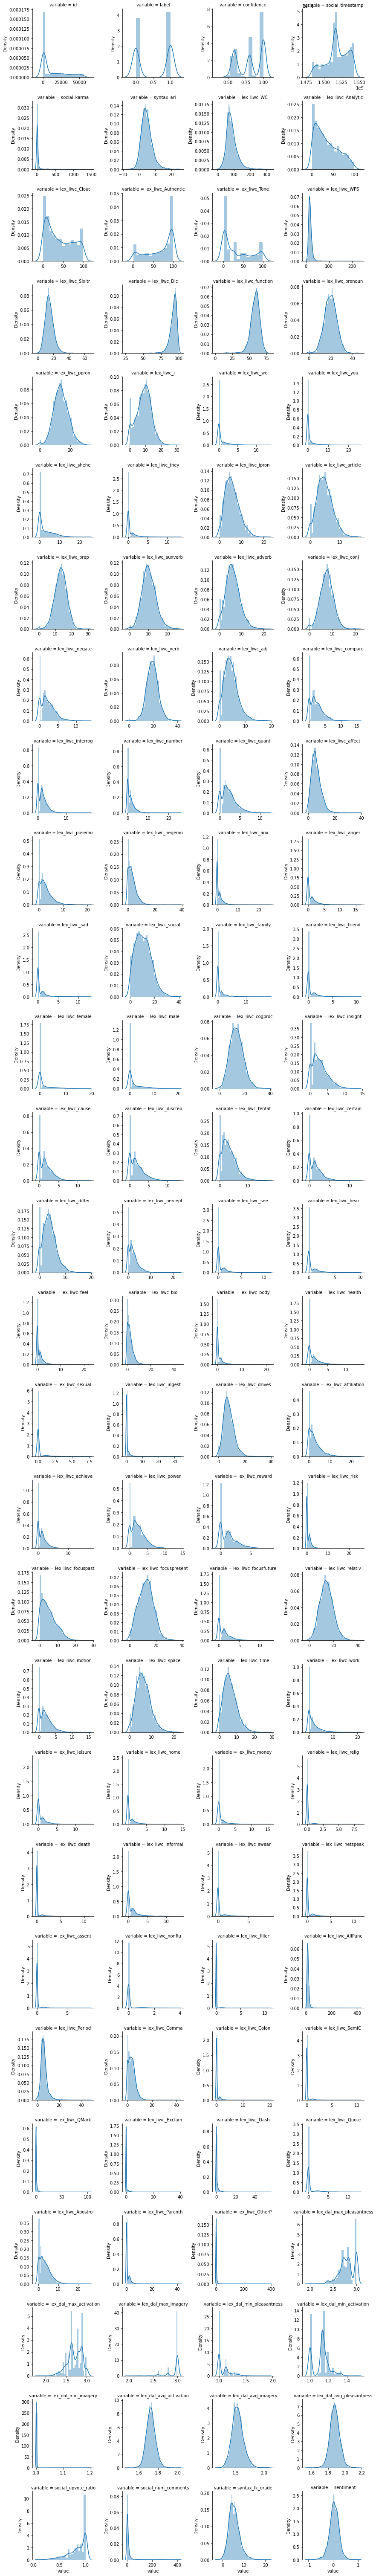

In [ ]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Columns: 116 entries, subreddit to sentiment
dtypes: float64(106), int64(6), object(4)
memory usage: 2.5+ MB


### Distplot Insights: -

Above is the distrution bar graphs to confirm about the statistics of the data about the skewness, the above results are:
1. 98 columns are positive skewed & 14 negative skewed.
### Why Distplot?
Skewness is demonstrated on a bell curve when data points are not distributed symmetrically to the left and right sides of the median on a bell curve. If the bell curve is shifted to the left or the right, it is said to be skewed.

We can observe that the bell curve is shifted to left we indicates positive skewness.As all the column are positively skewed we don't need to do scaling.

Let's proceed and check the distribution of the target variable.


In [ ]:
#df['label'].skew()

#### The target variable is positively skewed.A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables. 

# 3. Heatmap




A heatmap (or heat map) is a graphical representation of data where values are depicted by color.Heatmaps make it easy to visualize complex data and understand it at a glance 

__Correlation__ - A positive correlation is a relationship between two variables in which both variables move in the same direction. Therefore, when one variable increases as the other variable increases, or one variable decreases while the other decreases.

Correlation can have a value:

- 1 is a perfect positive correlation
- 0 is no correlation (the values don't seem linked at all)
- -1 is a perfect negative correlation



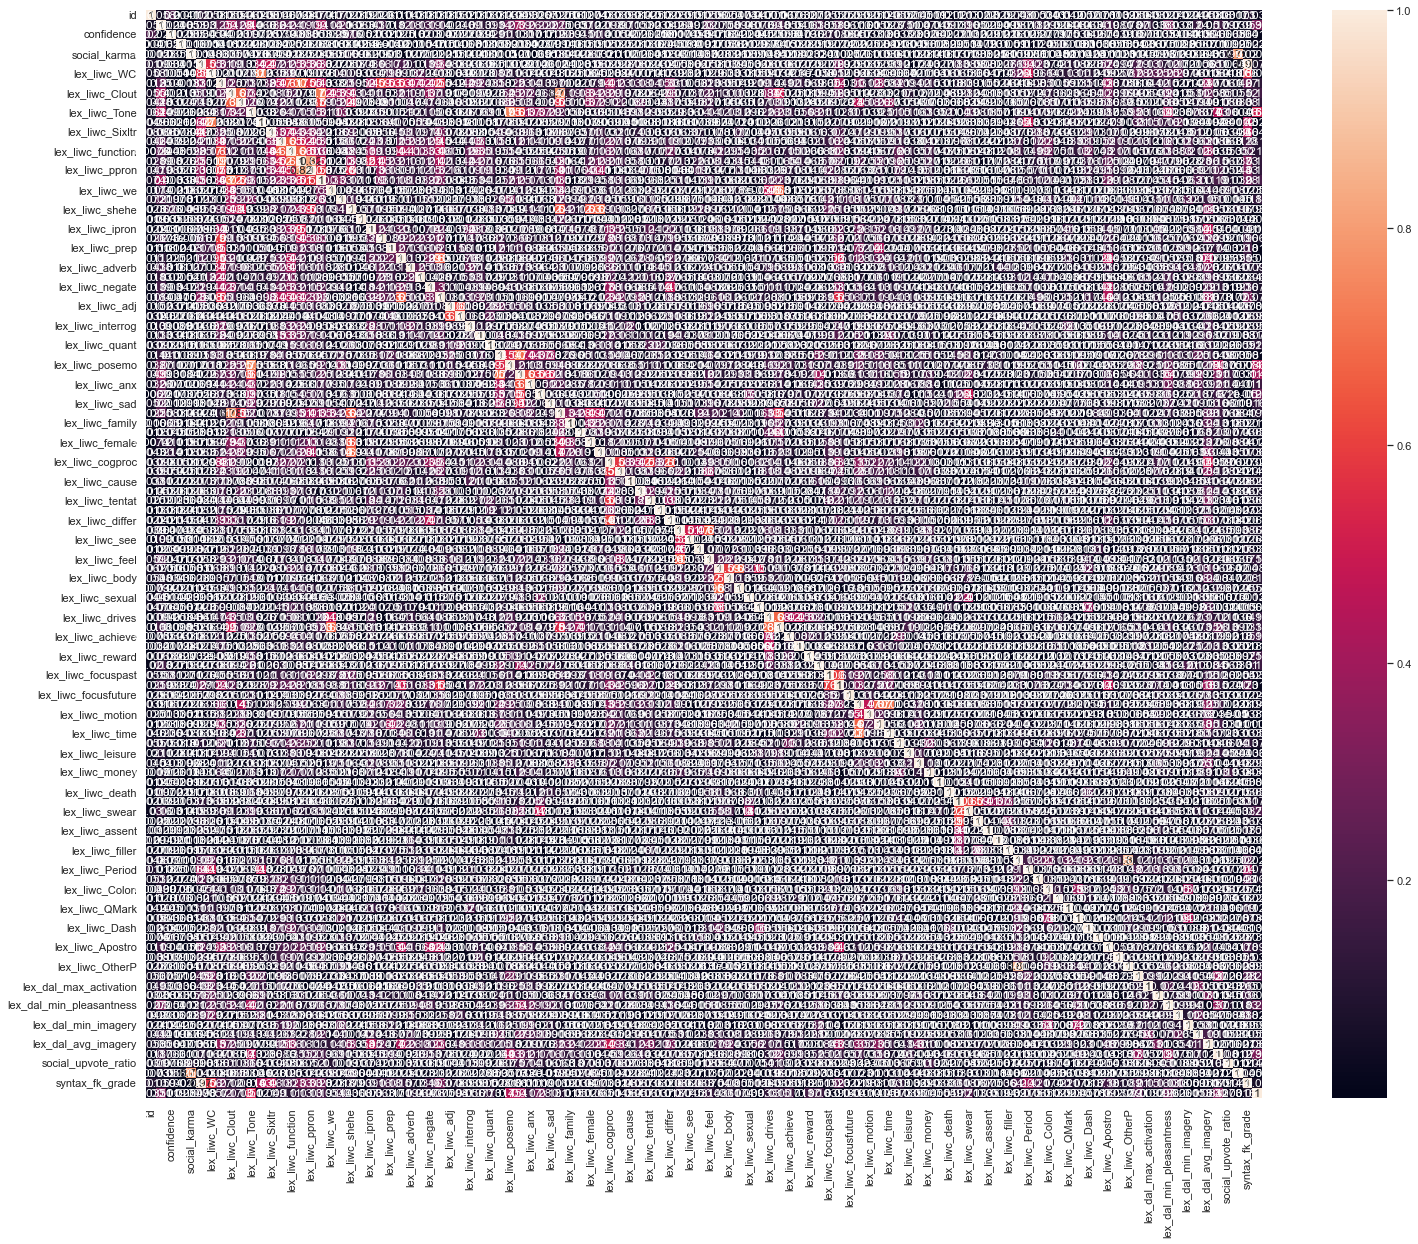

In [ ]:
#correlation plot
sns.set(rc = {'figure.figsize':(25,20)})
corr = df.corr().abs()
sns.heatmap(corr,annot=True) 
plt.show()

### Notice the last column from right side of this map. We can see the correlation of all variables against diagnosis. As you can see, some variables seem to be strongly correlated with the target variable. Here, a numeric correlation score will help us understand the graph better.

In [ ]:
print (corr['label'].sort_values(ascending=False)[:10], '\n') #top 15 values
print ('----------------------')
print (corr['label'].sort_values(ascending=False)[-10:]) #last 5 values`

label                       1.000000
lex_liwc_Tone               0.436005
lex_liwc_Clout              0.403804
lex_liwc_i                  0.400440
lex_liwc_negemo             0.387979
sentiment                   0.305157
lex_dal_min_pleasantness    0.297439
lex_liwc_Authentic          0.275282
lex_liwc_posemo             0.270672
lex_liwc_anx                0.260146
Name: label, dtype: float64 

----------------------
lex_liwc_tentat        0.019994
lex_liwc_prep          0.018080
lex_liwc_Period        0.017863
lex_liwc_relativ       0.016464
lex_dal_min_imagery    0.012440
lex_liwc_motion        0.009980
lex_liwc_filler        0.008957
social_timestamp       0.006504
lex_liwc_family        0.006500
lex_liwc_nonflu        0.004928
Name: label, dtype: float64


Here we see that the concave points_worst feature is 79% correlated with the target variable. Concave points represent the number of indentations present on the nuclear border.This parameter was found to be statistically significant (P < 0.0001) in differentiating hyperplasia from carcinoma.

### Heatmap insights: -

As we know, it is recommended to avoid correlated features in your dataset. Indeed, a group of highly correlated features will not bring additional information (or just very few), but will increase the complexity of the algorithm, hence increasing the risk of errors.




### Why Heatmap?

Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables.

In [ ]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

In [ ]:
to_drop

['lex_liwc_ppron', 'lex_liwc_OtherP', 'syntax_fk_grade']

These are the columns that we have to drop. 

In [ ]:
df.head()

subreddit post_id sentence_range  \
0              ptsd  8601tu       (15, 20)   
1        assistance  8lbrx9         (0, 5)   
2              ptsd  9ch1zh       (15, 20)   
3     relationships  7rorpp        [5, 10]   
4  survivorsofabuse  9p2gbc         [0, 5]   

                                                text     id  label  \
0  said felt way sugget go rest trigger ahead you...  33181      1   
1  hey rassist sure right place post goe  im curr...   2606      0   
2  mom hit newspap shock would know dont like pla...  38816      1   
3  met new boyfriend amaz kind sweet good student...    239      1   
4  octob domest violenc awar month domest violenc...   1421      1   

   confidence  social_timestamp  social_karma  syntax_ari  ...  \
0         0.8        1521614353             5    1.806818  ...   
1         1.0        1527009817             4    9.429737  ...   
2         0.8        1535935605             2    7.769821  ...   
3         0.6        1516429555             0    2.667798  ...   
4         0.8        1539809005            24    7.554238  ...   

   lex_dal_min_pleasantness  lex_dal_min_activation  lex_dal_min_imagery  \
0                     1.000                  1.1250                  1.0   
1                     1.125                  1.0000                  1.0   
2                     1.000                  1.1429                  1.0   
3                     1.000                  1.1250                  1.0   
4                     1.000                  1.1250                  1.0   

   lex_dal_avg_activation  lex_dal_avg_imagery  lex_dal_avg_pleasantness  \
0                 1.77000              1.52211                   1.89556   
1                 1.69586              1.62045                   1.88919   
2                 1.83088              1.58108                   1.85828   
3                 1.75356              1.52114                   1.98848   
4                 1.77644              1.64872                   1.81456   

   social_upvote_ratio  social_num_comments  syntax_fk_grade  sentiment  
0                 0.86                    1         3.253573  -0.002742  
1                 0.65                    2         8.828316   0.292857  
2                 0.67                    0         7.841667   0.011894  
3                 0.50                    5         4.104027   0.141671  
4                 1.00                    1         7.910952  -0.204167  

[5 rows x 116 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Columns: 116 entries, subreddit to sentiment
dtypes: float64(106), int64(6), object(4)
memory usage: 2.5+ MB


Here, we are checking which columns we have after "to-drop".

# 4. Boxplot

![211626365402575-b88c4d0fdacd5abb4c3dc2de3bc004bb.png](attachment:211626365402575-b88c4d0fdacd5abb4c3dc2de3bc004bb.png)

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”).

Basically, to find the outlier in a dataset/column.

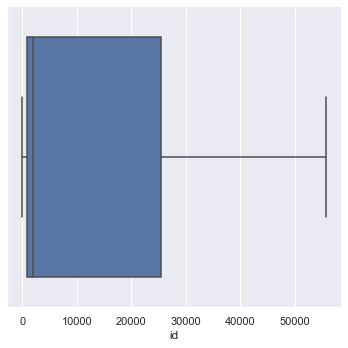

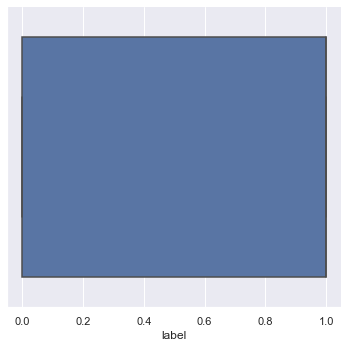

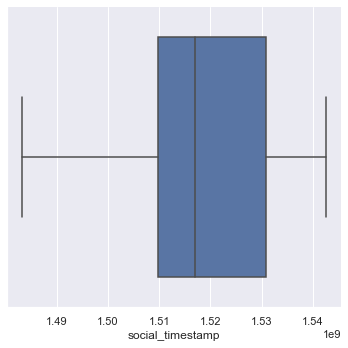

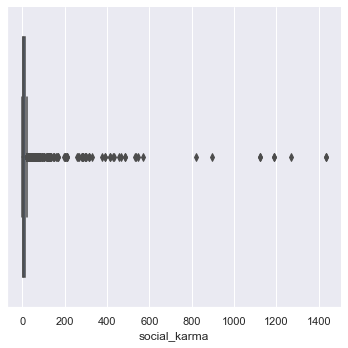

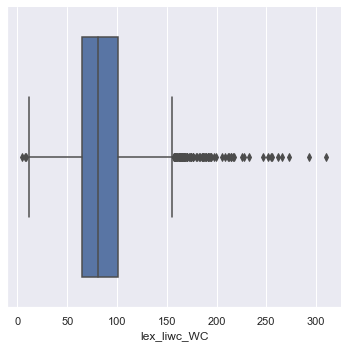

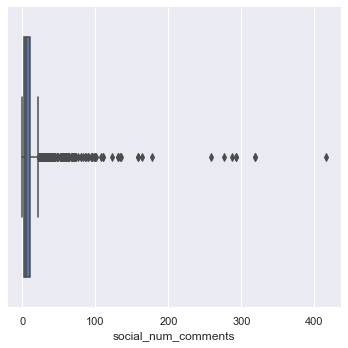

In [ ]:
#feature columns
for value in int64_lst:
    sns.catplot(data=df, x=value,  kind="box")

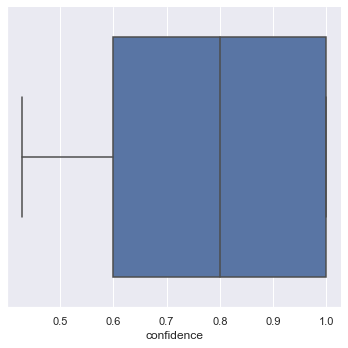

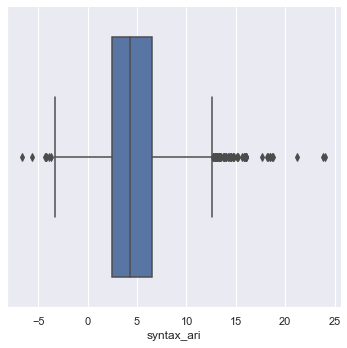

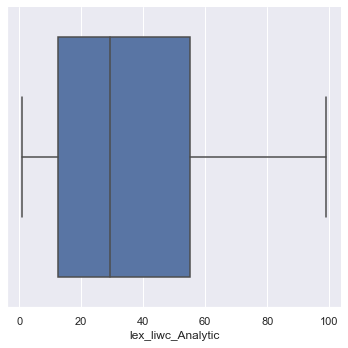

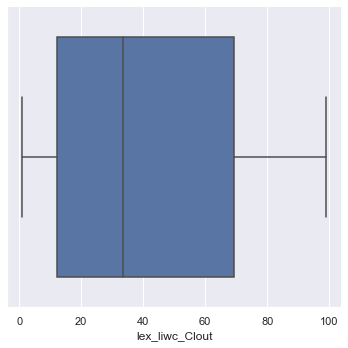

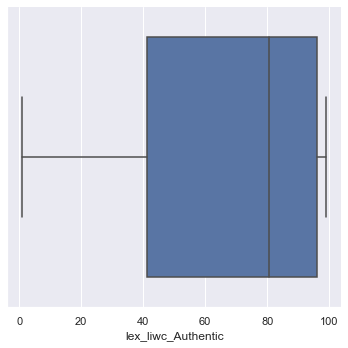

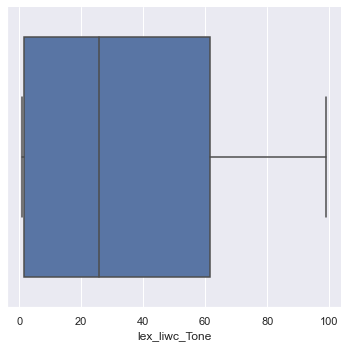

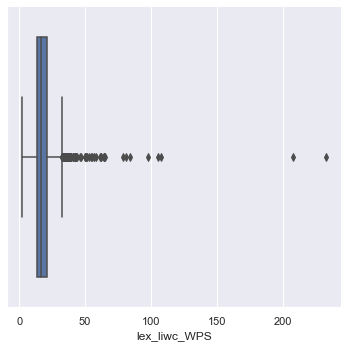

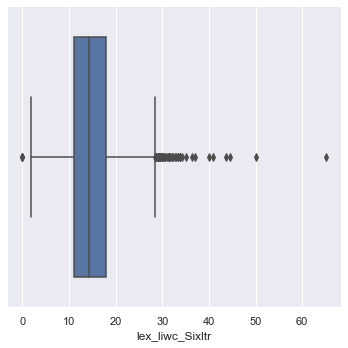

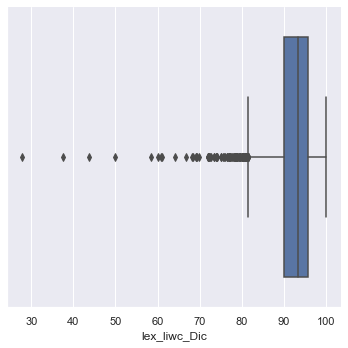

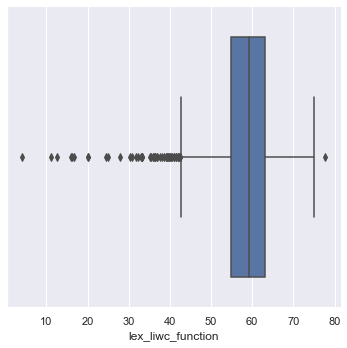

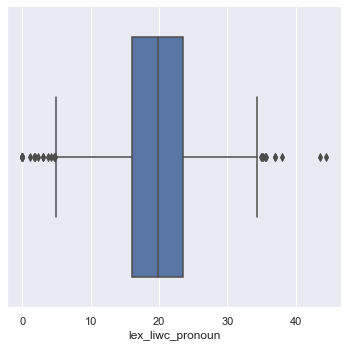

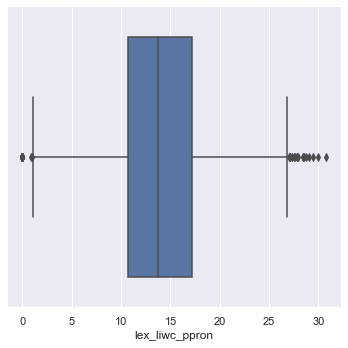

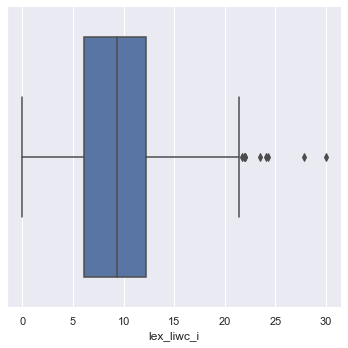

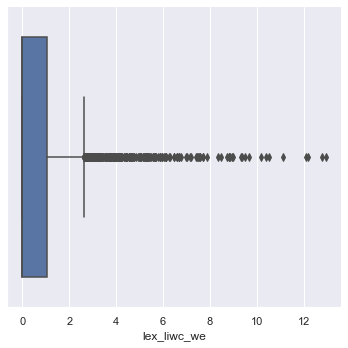

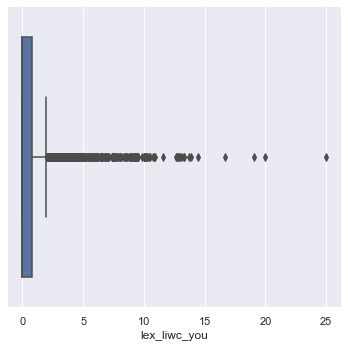

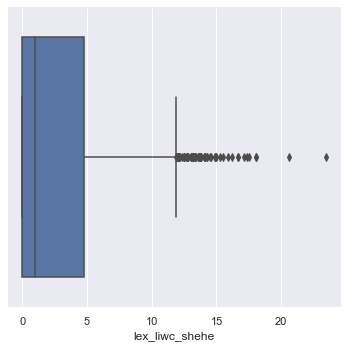

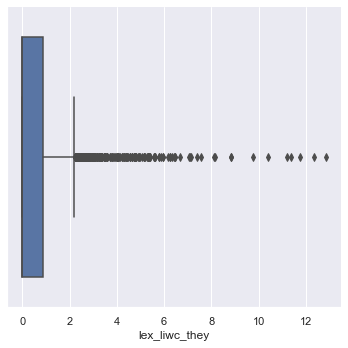

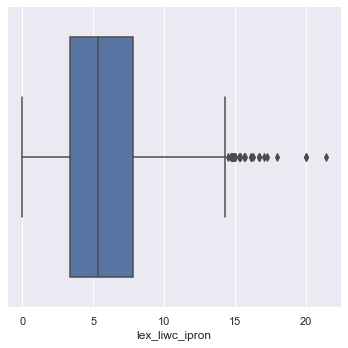

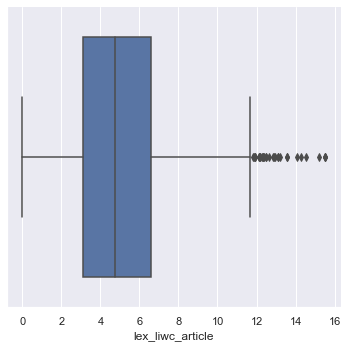

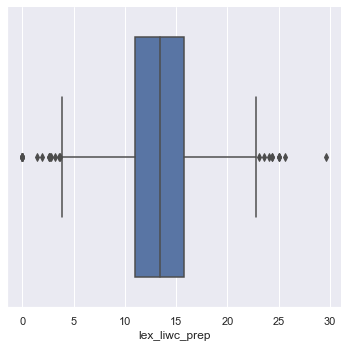

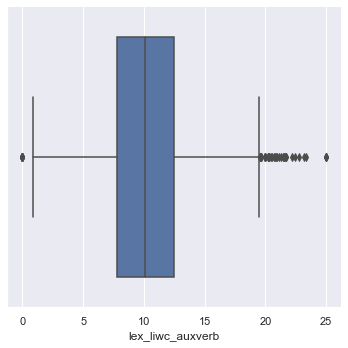

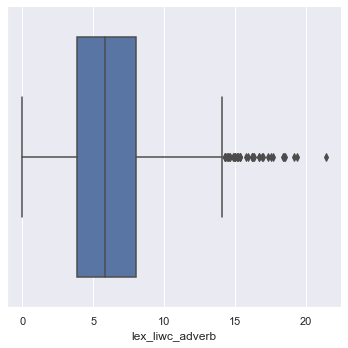

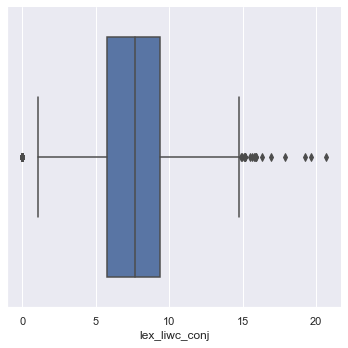

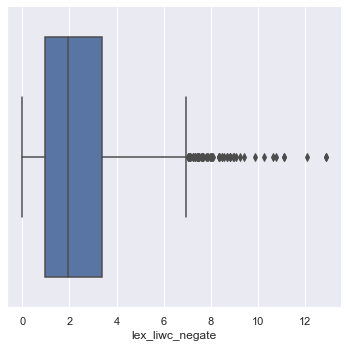

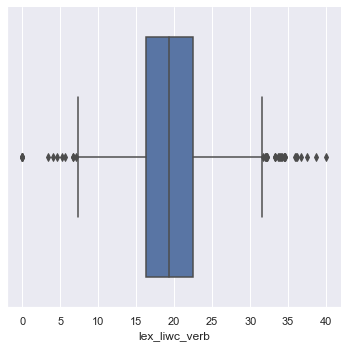

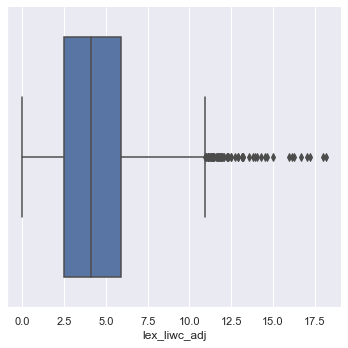

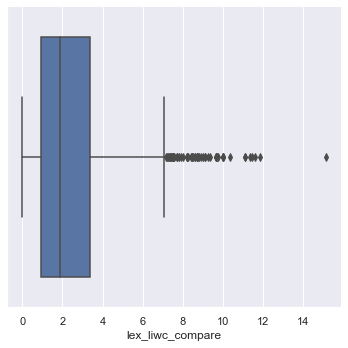

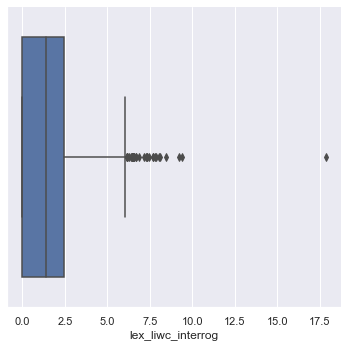

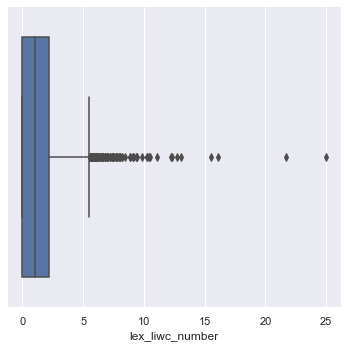

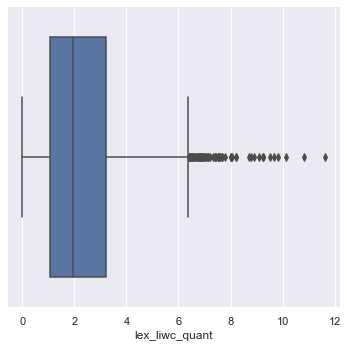

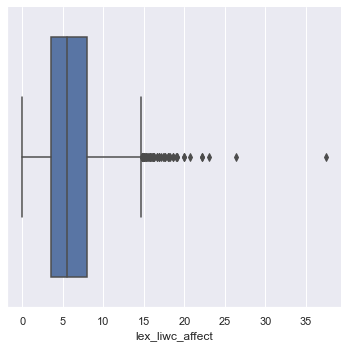

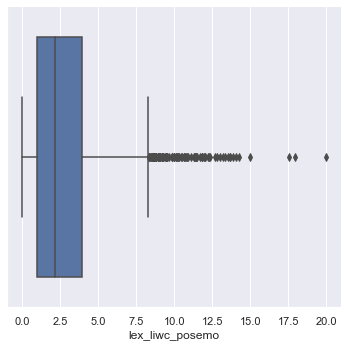

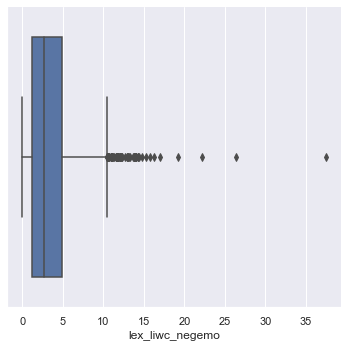

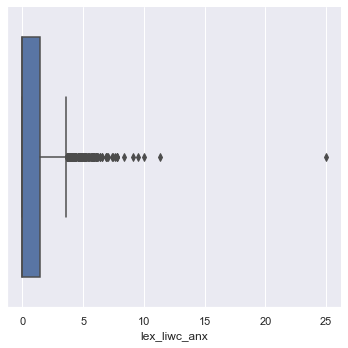

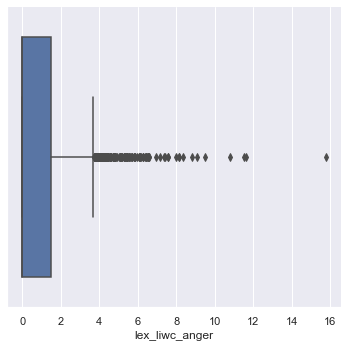

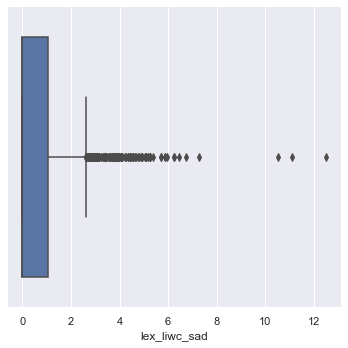

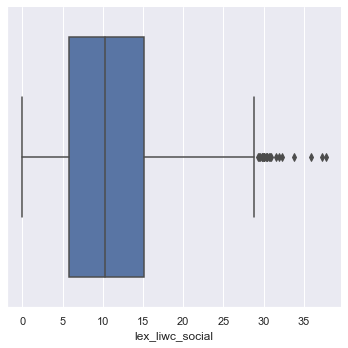

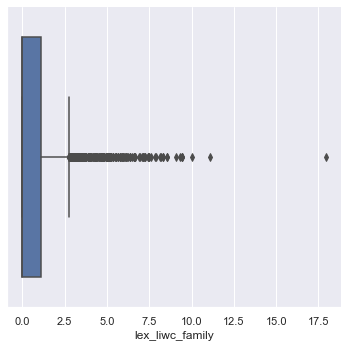

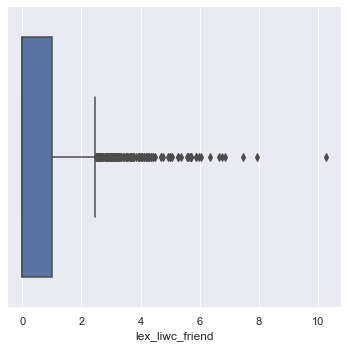

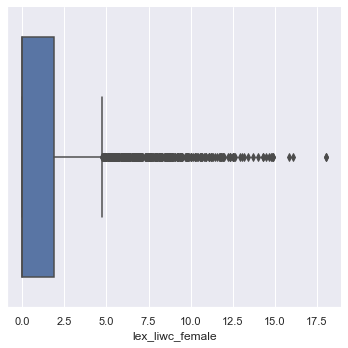

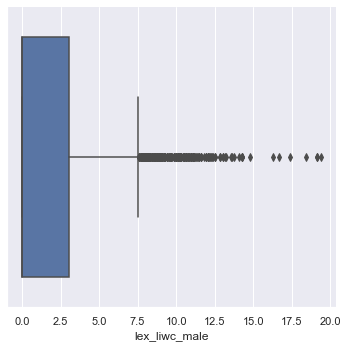

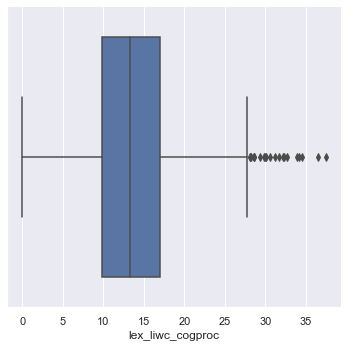

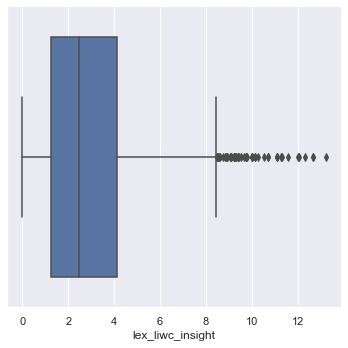

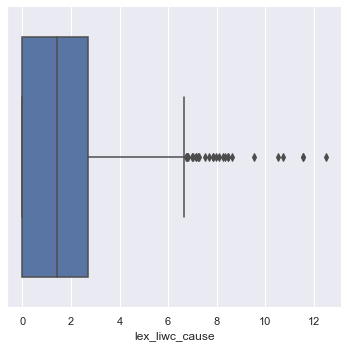

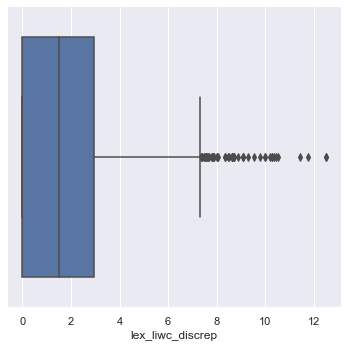

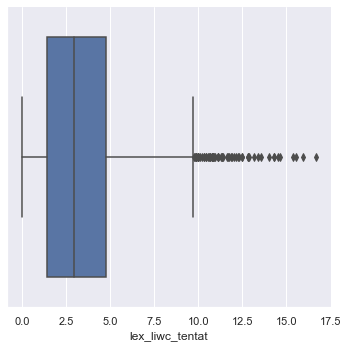

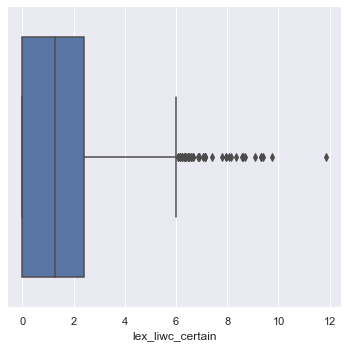

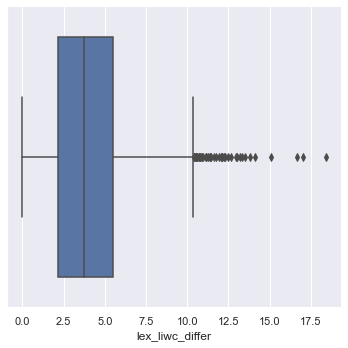

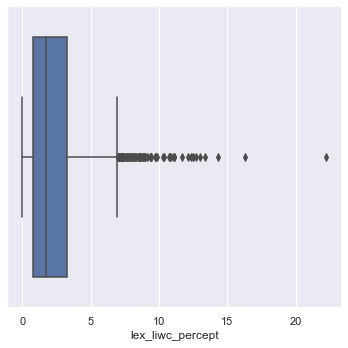

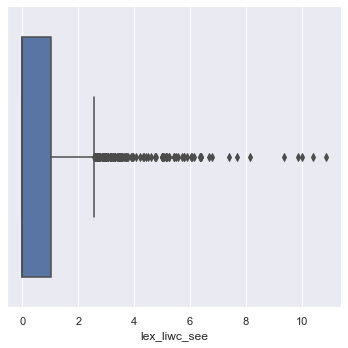

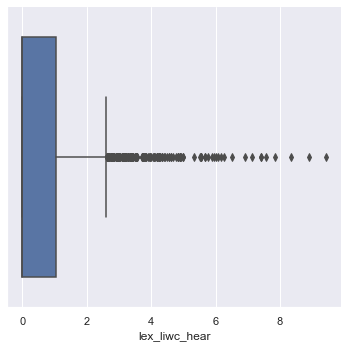

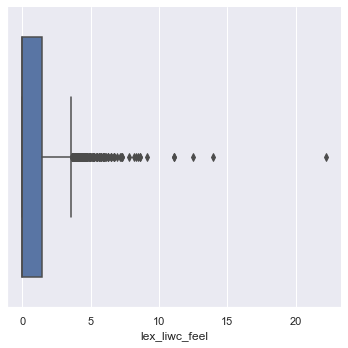

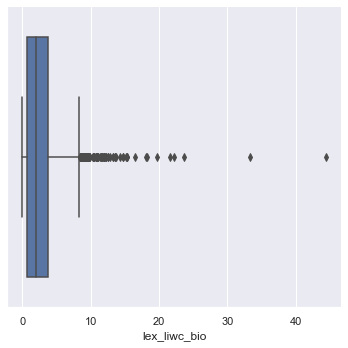

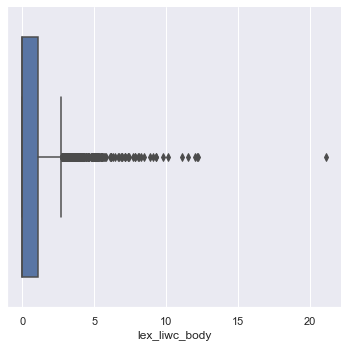

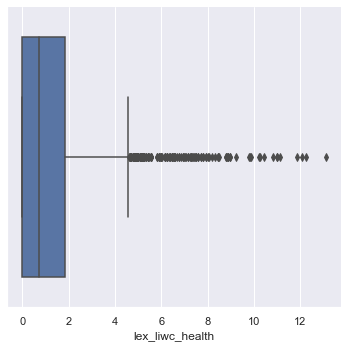

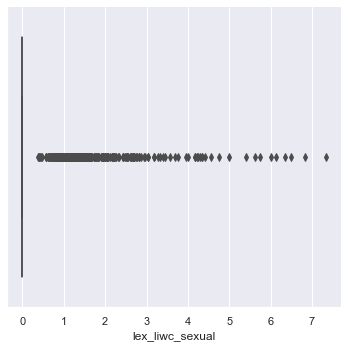

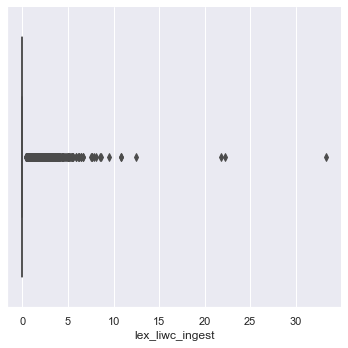

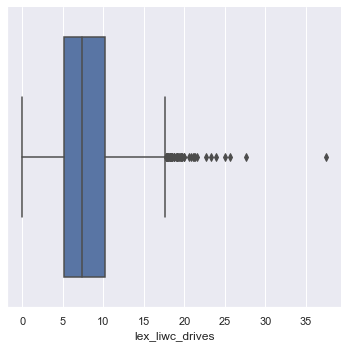

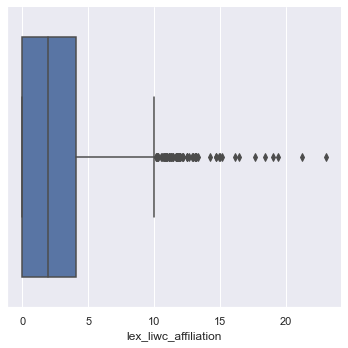

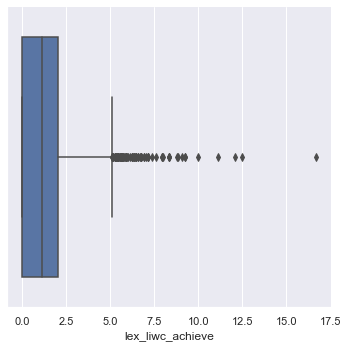

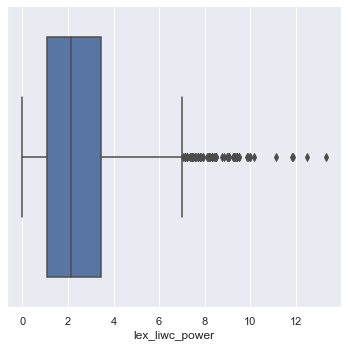

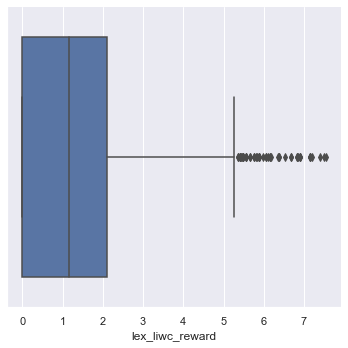

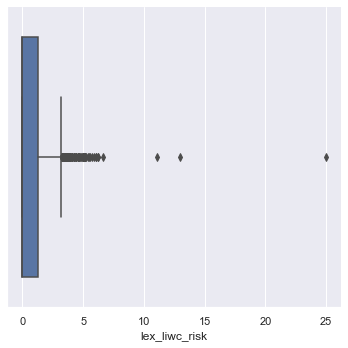

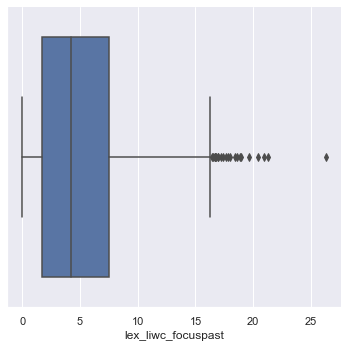

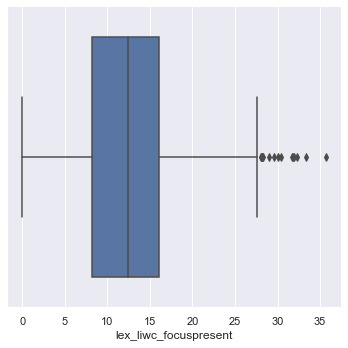

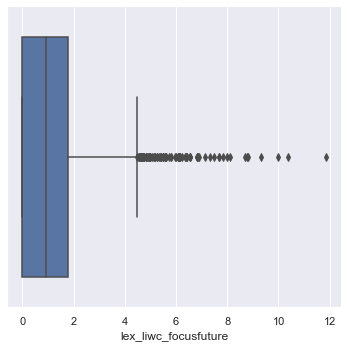

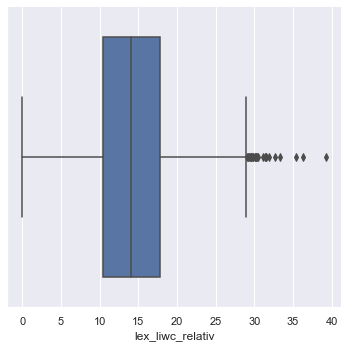

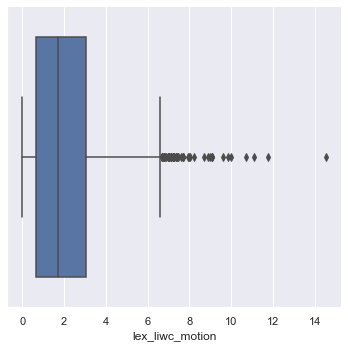

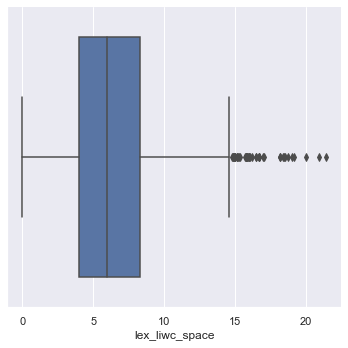

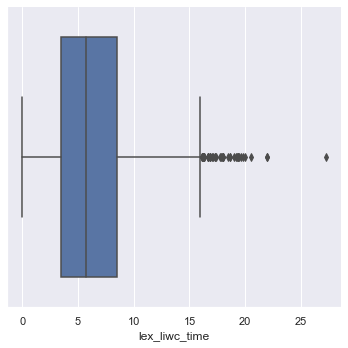

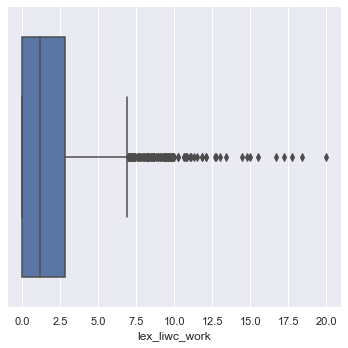

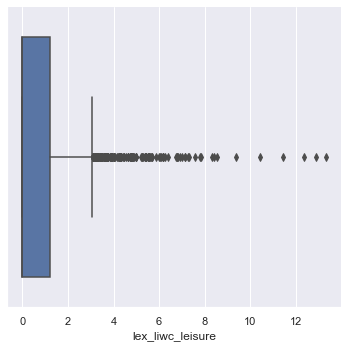

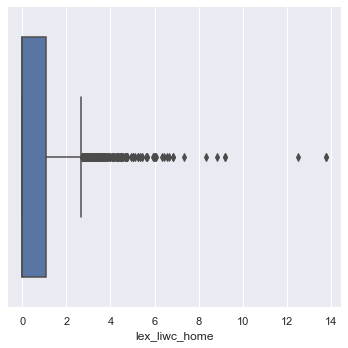

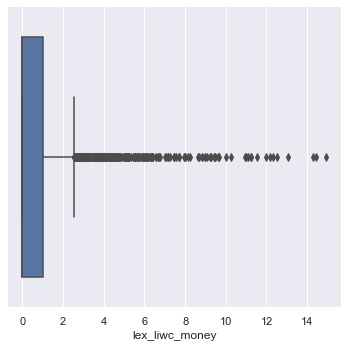

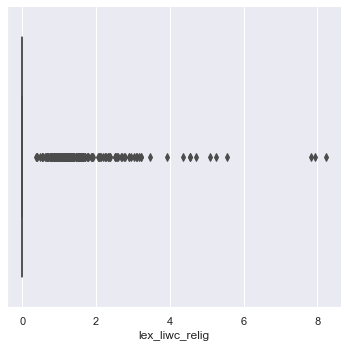

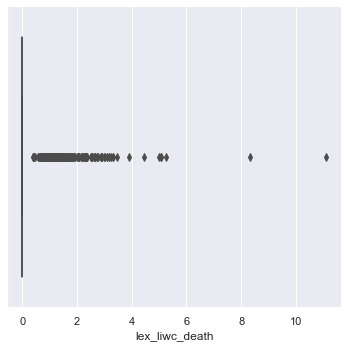

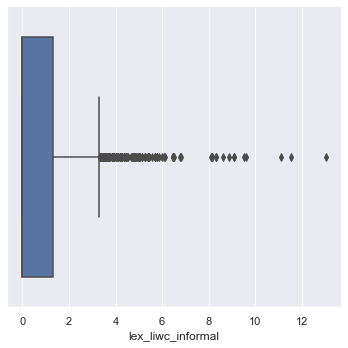

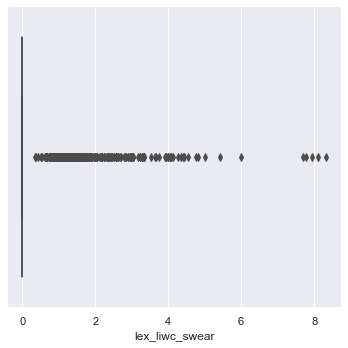

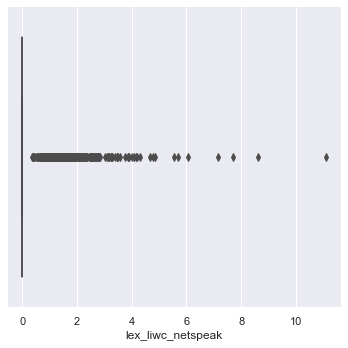

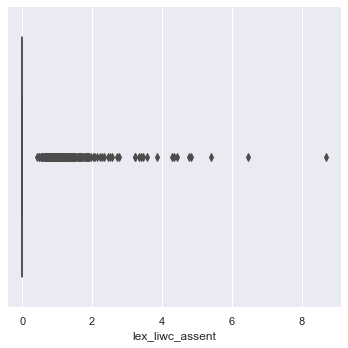

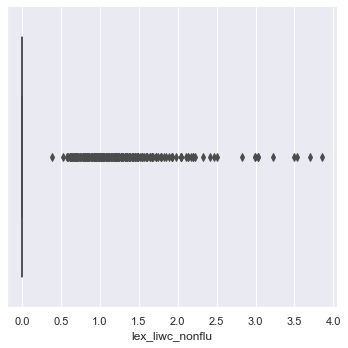

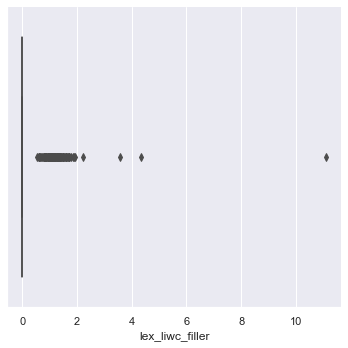

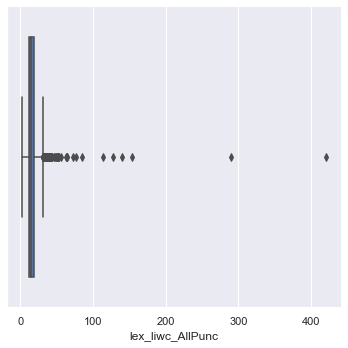

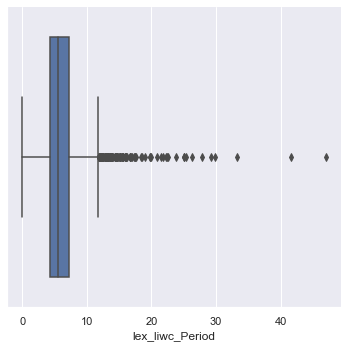

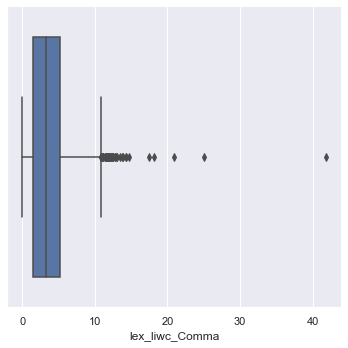

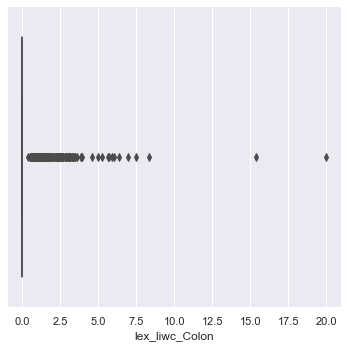

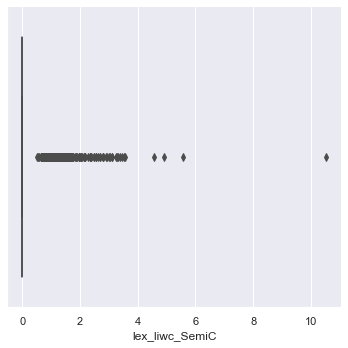

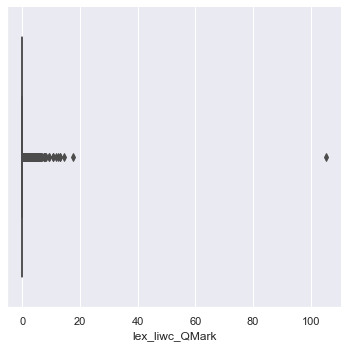

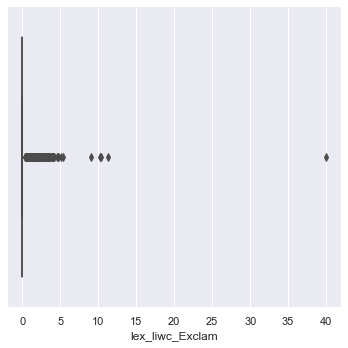

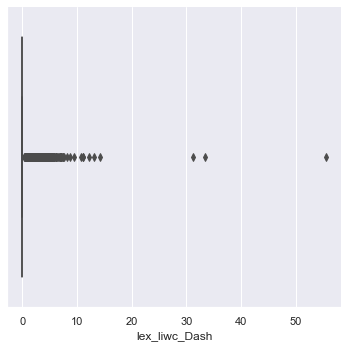

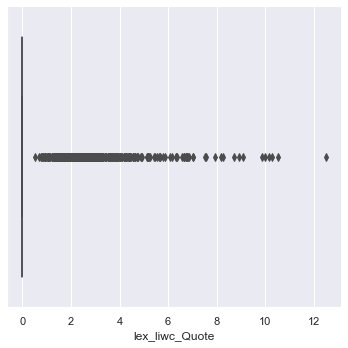

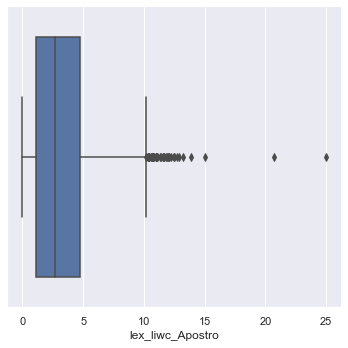

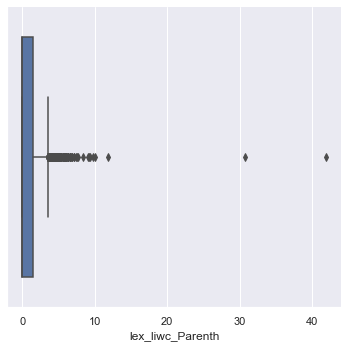

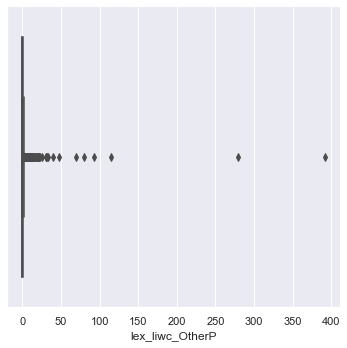

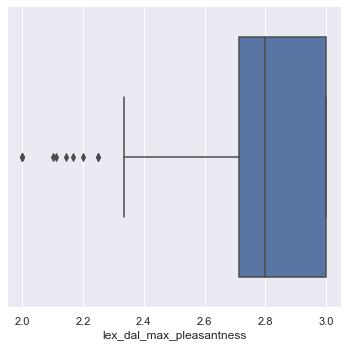

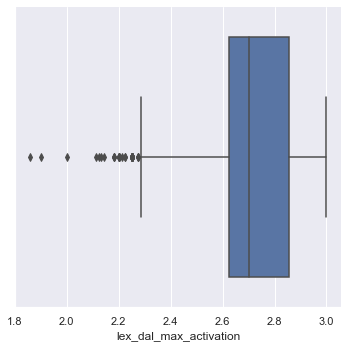

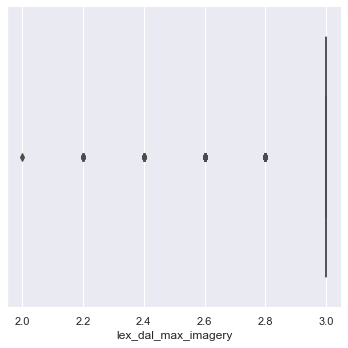

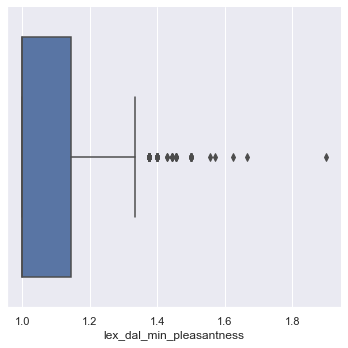

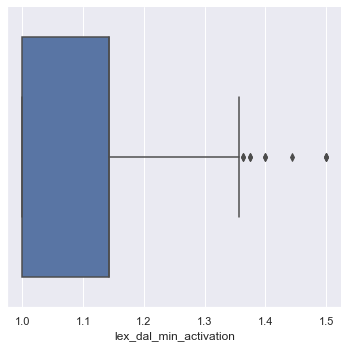

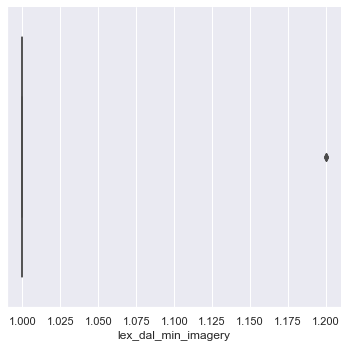

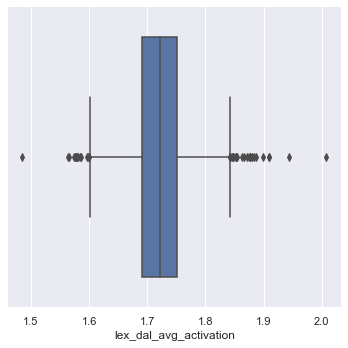

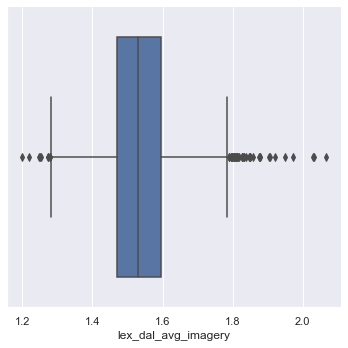

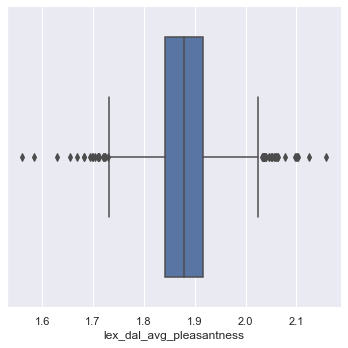

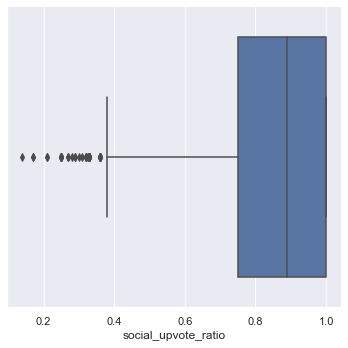

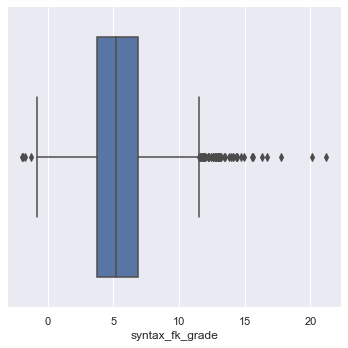

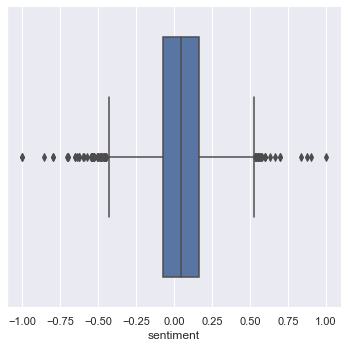

In [ ]:
#feature columns
for value in float64_lst:
    sns.catplot(data=df, x=value,  kind="box")

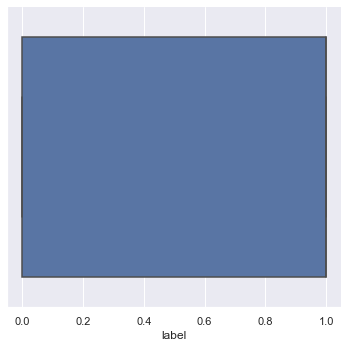

In [ ]:
#for target variable
sns.catplot(data=df, x='label', kind='box')

#### The dark points are known as Outliers. Outliers are those data points that are significantly different from the rest of the dataset. They are often abnormal observations that skew the data distribution, and arise due to inconsistent data entry, or erroneous observations.

### Boxplot Insights: - 
- Sometimes outliers may be an error in the data and should be removed. In this case these points are correct readings yet they are different from the other points that they appear to be incorrect.

- The best way to decide wether to remove them or not is to train models with and without these data points and compare their validation accuracy.

- So we will keep it unchanged as it won't affect our model.

Here, we can see that most of the variables possess outlier values. It would take us days if we start treating these outlier values one by one. Hence, for now we'll leave them as is and let our algorithm deal with them. As we know, tree-based algorithms are usually robust to outliers.

### Why Boxplot?
Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.



In the next step we will divide our cleaned data into training data and testing data.

# 5. Worldcloud


A Word Cloud is a collection or cluster of words depicted in different sizes. The bigger and bolder the word appears, the more often it is selected/voted for by an audience member. Word Clouds are a powerful way to visualise what your audience really thinks about a topic.

Now let’s have a look at the most used words by the people sharing about their life problems on social media by visualizing a word cloud of the text column

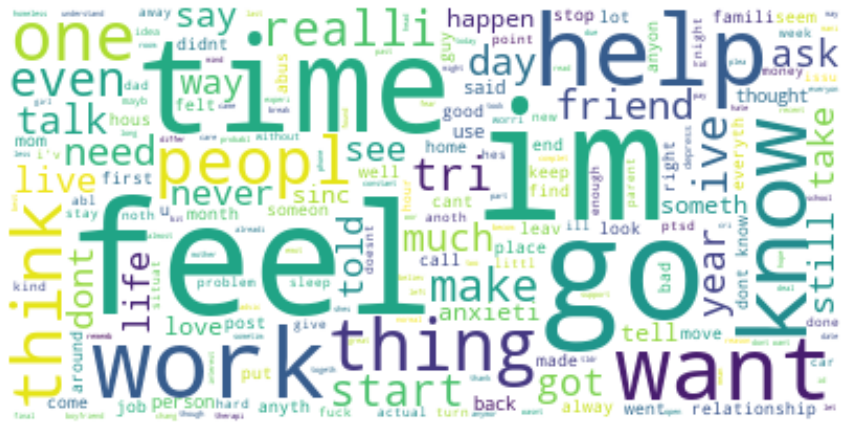

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in df.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Why WorldCloud ?

The word cloud graphic is a visual representation that supplements a section of text to help readers better understand an idea or approach a subject from a different angle. A word cloud shows off trends.

### Before moving to Data Preparation we need to set label column labels as  0 and 1. 0 means no stress, and 1 means stress

The label column in this dataset contains labels as 0 and 1. 0 means no stress, and 1 means stress. I will use Stress and No stress labels instead of 1 and 0. So let’s prepare this column accordingly and select the text and label columns for the process of training a machine learning model:

In [ ]:
df["label"] = df["label"].map({0: "No Stress", 1: "Stress"})
df = df[["text", "label"]]
print(df.head())

                                                text      label
0  said felt way sugget go rest trigger ahead you...     Stress
1  hey rassist sure right place post goe  im curr...  No Stress
2  mom hit newspap shock would know dont like pla...     Stress
3  met new boyfriend amaz kind sweet good student...     Stress
4  octob domest violenc awar month domest violenc...     Stress


In [ ]:
df.iloc[1]

text     hey rassist sure right place post goe  im curr...
label                                            No Stress
Name: 1, dtype: object

# Step 2: Data Preparation
**Goal:-**

Tasks we are going to in this step:

1. Now we will separate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.
2. Split dataset into train and test dataset.
3. Model Training




### 1. Now we will separate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Separate target and feature column in X and y variable

# X will be the features
X = np.array(df["text"])

# y will be the target variable
y = np.array(df["label"])



In [ ]:
X


array(['said felt way sugget go rest trigger ahead youir hypocondriac like decid look feel doom hope mayb get suck rabbit hole ludicr conspiraci stupid psychic test new age bs someth could even laugh road end read sens doom indic various health ailment one prone top doom gloomi fn worri heart happen physic  hour',
       'hey rassist sure right place post goe  im current student intern sandia nation lab work survey help improv market outreach effort mani school recruit around countri look current undergradgrad stem student your stem student know stem student would great appreci help take pass along short survey thank everyon help take survey enter draw chanc win one three  amazon gcs',
       'mom hit newspap shock would know dont like play hit smack strike hit violenc sort person send vibe ask univers yesterday decid take friend go help anoth friend move new place drive friend move strike shoulder address immedi  time told thing friend drive near get collis anoth car think high mariju

In [ ]:
y

array(['Stress', 'No Stress', 'Stress', ..., 'No Stress', 'No Stress',
       'Stress'], dtype=object)

In [ ]:
# Check the shape of X and y variable
X.shape, y.shape

((2838,), (2838,))

### 2. Split dataset into train and test dataset.

In [ ]:
cv = CountVectorizer()
X = cv.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                test_size=0.33, 
                                                random_state=42)

### Insights: -

Train test split technique is used to estimate the performance of machine learning algorithms which are used to make predictions on data not used to train the model.It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem. Although simple to use and interpret, there are times when the procedure should not be used, such as when you have a small dataset and situations where additional configuration is required, such as when it is used for classification and the dataset is not balanced.


In the next step we will train our model on the basis of our training and testing data.


# Step 3: Model Training

#### Goal: In this step we are going to train our dataset on different algorithms.


In this step we are going to train our dataset on different classification algorithms. As we know that our target variable is in discrete format so we have to apply classification algorithm. Target variable is a category like filtering.In our dataset we have the outcome variable or Dependent variable i.e Y having only two set of values, either 1 (Stress) or 0(No Stress). So we will use Classification algorithm**

Algorithms we are going to use in this step

1. Bernoulli Naive Bayes
2. Linear SVC
3. Random Forest Classification



K-fold cross validation is a procedure used to estimate the skill of the model on new data. There are common tactics that you can use to select the value of k for your dataset. There are commonly used variations on cross-validation, such as stratified and repeated, that are available in scikit-learn



In [ ]:
# Define kfold with 10 split
cv1 = KFold(n_splits=10, shuffle=True, random_state=42)

The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).

# 1. Bernoulli Naive Bayes

Naive Bayes is a supervised machine learning algorithm to predict the probability of different classes based on numerous attributes. It indicates the likelihood of occurrence of an event. Naive Bayes is also known as conditional probability.

Bernoulli Naive Bayes is a part of the Naive Bayes family. It is based on the Bernoulli Distribution and accepts only binary values, i.e., 0 or 1. If the features of the dataset are binary, then we can assume that Bernoulli Naive Bayes is the algorithm to be used.

### Train set cross-validation

In [ ]:
#Using Bernoulli Naive Bayes algorithm to the Training Set
from sklearn.naive_bayes import BernoulliNB

BNB = BernoulliNB()

BNB.fit(X_train, y_train)

BernoulliNB()

In [ ]:
#Accuracy check of trainig data

#Get R2 score
BNB.score(X_train, y_train)


0.9195160441872698

In [ ]:
#Accuracy check of trainig data

#Get R2 score
BNB.score(X_test, y_test)


0.7470651013874067

#### Prediction
Now we will perform prediction on the dataset using BernoulliNB.

In [ ]:
# Predict the values on X_test_scaled dataset 
y_predicted = BNB.predict(X_test)

### Various parameters are calculated for analysing the predictions.

1) Confusion Matrix 
2) Classification Report 
3) Accuracy Score 
4) Precision Score 
5) Recall Score
6) F1 Score


# Confusion Matrix

A confusion matrix presents a table layout of the different outcomes of the prediction and results of a classification problem and helps visualize its outcomes. It plots a table of all the predicted and actual values of a classifier.

Image daaal

This diagram helps in understanding the concept of confusion matrix.

In [ ]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

In [ ]:
#confusion matrix btw y_test and y_predicted
cm = confusion_matrix(y_test,y_predicted)

Text(21.5, 0.5, 'True Class')

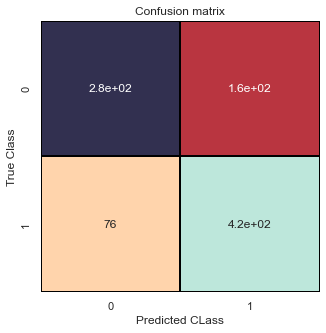

In [ ]:
#We are creating Confusion Matrix on heatmap to have better understanding 
# sns.heatmap(cm,cmap = 'Red') ~ to check for available colors
sns.set(rc = {'figure.figsize':(5,5)})
sns.heatmap(cm,cmap = 'icefire_r', annot = True, cbar=False, linecolor='Black', linewidth = 2)

plt.title("Confusion matrix")

plt.xlabel('Predicted CLass')
plt.ylabel('True Class')


<AxesSubplot:>

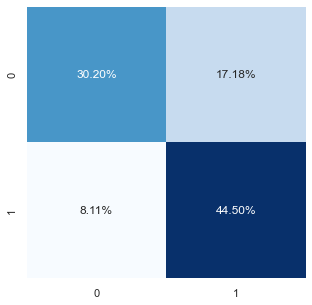

In [ ]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)

# Evaluating all kinds of evaluating parameters.

#### Classification Report :

A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model.

#### F1_score :

The F1 score is a machine learning metric that can be used in classification models.

#### Precision_score :

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0.

#### Recall_score :

Recall score is used to measure the model performance in terms of measuring the count of true positives in a correct manner out of all the actual positive values. Precision-Recall score is a useful measure of success of prediction when the classes are very imbalanced.

In [ ]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
  

print("The model used is  Bernoulli Naive Bayes")
  
l_acc = accuracy_score(y_test, y_predicted)
print("\nThe accuracy is: {}".format(l_acc))
  
prec = precision_score(y_test, y_predicted,average="binary", pos_label="Stress")
print("The precision is: {}".format(prec))
  
rec = recall_score(y_test, y_predicted,average="binary", pos_label="Stress")
print("The recall is: {}".format(rec))
  
f1 = f1_score(y_test, y_predicted,average="binary", pos_label="Stress")
print("The F1-Score is: {}".format(f1))
  
c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print(c1)

The model used is  Bernoulli Naive Bayes

The accuracy is: 0.7470651013874067
The precision is: 0.7214532871972318
The recall is: 0.845841784989858
The F1-Score is: 0.7787114845938374
Classification Report is:

              precision    recall  f1-score   support

   No Stress       0.79      0.64      0.70       444
      Stress       0.72      0.85      0.78       493

    accuracy                           0.75       937
   macro avg       0.75      0.74      0.74       937
weighted avg       0.75      0.75      0.74       937



# 2. Linear SVC

The objective of a Linear SVC (Support Vector Classifier) is to fit to the data you provide, returning a "best fit" hyperplane that divides, or categorizes, your data. From there, after getting the hyperplane, you can then feed some features to your classifier to see what the "predicted" class is. This makes this specific algorithm rather suitable for our uses, though you can use this for many situations.

In [ ]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.svm import LinearSVC
classifier = LinearSVC()
classifier.fit(X_train, y_train)

LinearSVC()

In [ ]:
#Accuracy check of trainig data
#Get R2 score
classifier.score(X_train, y_train)

1.0

In [ ]:
#Accuracy check of test data
#Get R2 score
classifier.score(X_test, y_test)

0.6937033084311632

#### Prediction

Now we will perform prediction on the dataset using Linear SVC.


In [ ]:
# Predict the values on X_test_scaled dataset 
y_predicted = classifier.predict(X_test)


# Various parameters are calculated for analysing the predictions.
1) Confusion Matrix 2) Classification Report 3) Accuracy Score 4) Precision Score 5) Recall Score 6) F1 Score


# Confusion Matrix

A confusion matrix presents a table layout of the different outcomes of the prediction and results of a classification problem and helps visualize its outcomes. It plots a table of all the predicted and actual values of a classifier.

In [ ]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

In [ ]:
#Confusion matrix btw y_test and y_predicted
cm = confusion_matrix(y_test,y_predicted)

Text(21.5, 0.5, 'True Class')

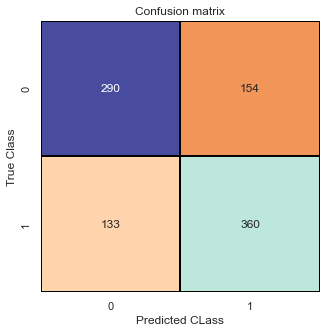

In [ ]:
#We are drawing cm on heatmap to have better understanding 
# sns.heatmap(cm,cmap = 'Red') ~ to check for available colors
sns.heatmap(cm,cmap = 'icefire_r', annot = True, fmt= 'd', cbar=False, linecolor='Black', linewidth = 2)
plt.title("Confusion matrix")

plt.xlabel('Predicted CLass')
plt.ylabel('True Class')

<AxesSubplot:>

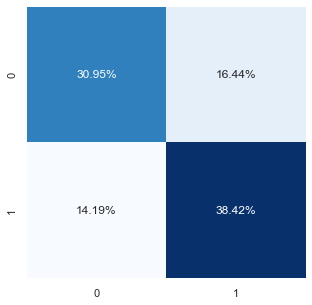

In [ ]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)

# Evaluating all kinds of evaluating parameters.



In [ ]:

# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix  
print("The model used is LinearSVC")  

k_acc = accuracy_score(y_test, y_predicted)
print("\nThe accuracy is: {}".format(k_acc))  

prec = precision_score(y_test, y_predicted,average="binary", pos_label="Stress")
print("The precision is: {}".format(prec))  

rec = recall_score(y_test, y_predicted,average="binary", pos_label="Stress")
print("The recall is: {}".format(rec))  

f1 = f1_score(y_test, y_predicted,average="binary", pos_label="Stress")
print("The F1-Score is: {}".format(f1))  

c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print(c1)    

The model used is LinearSVC

The accuracy is: 0.6937033084311632
The precision is: 0.7003891050583657
The recall is: 0.7302231237322515
The F1-Score is: 0.714995034756703
Classification Report is:

              precision    recall  f1-score   support

   No Stress       0.69      0.65      0.67       444
      Stress       0.70      0.73      0.71       493

    accuracy                           0.69       937
   macro avg       0.69      0.69      0.69       937
weighted avg       0.69      0.69      0.69       937



# 3. Random Forest Classifier

Random Forest is a powerful and versatile supervised machine learning algorithm that grows and combines multiple decision trees to create a “forest.” It can be used for both classification and regression problems in R and Python.
Random Forest and Decision Tree Algorithm are considered best for the data that has outliers.

In [ ]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

from sklearn.ensemble import RandomForestClassifier
#clas = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
clas = RandomForestClassifier()
clas.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
#Accuracy check of trainig data
#Get R2 score
clas.score(X_train, y_train)

1.0

In [ ]:
#Accuracy check of test data
#Get R2 score
clas.score(X_test, y_test)

0.7182497331910352

####  Prediction
Now we will perform prediction on the dataset using Random Forest Classifier Linear.

In [ ]:
# predict the values on X_test_scaled dataset 
y_predicted = clas.predict(X_test)

In [ ]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

In [ ]:
#confusion matrix btw y_test and y_predicted
cm = confusion_matrix(y_test,y_predicted)

Text(21.5, 0.5, 'True Class')

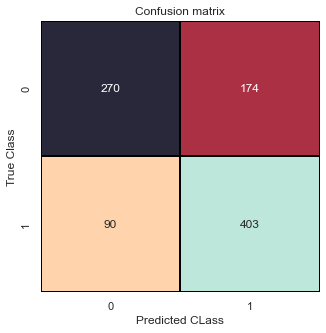

In [ ]:
#We are drawing cm on heatmap to have better understanding 
# sns.heatmap(cm,cmap = 'Red') ~ to check for available colors
sns.heatmap(cm,cmap = 'icefire_r', annot = True, fmt= 'd', cbar=False, linecolor='Black', linewidth = 2)
plt.title("Confusion matrix")

plt.xlabel('Predicted CLass')
plt.ylabel('True Class')

<AxesSubplot:>

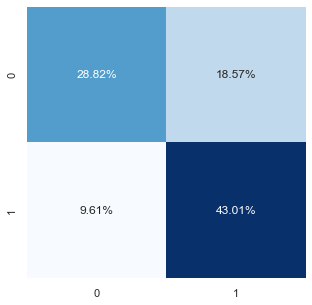

In [ ]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)

# Evaluating all kinds of evaluating parameters.

In [ ]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix  
print("The model used is Random Forest Classifier ")  

r_acc = accuracy_score(y_test, y_predicted)
print("\nThe accuracy is: {}".format(k_acc))  

prec = precision_score(y_test, y_predicted,average="binary", pos_label="Stress")
print("The precision is: {}".format(prec))  

rec = recall_score(y_test, y_predicted,average="binary", pos_label="Stress")
print("The recall is: {}".format(rec))  

f1 = f1_score(y_test, y_predicted,average="binary", pos_label="Stress")
print("The F1-Score is: {}".format(f1))  

c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print(c1)    

The model used is Random Forest Classifier 

The accuracy is: 0.6937033084311632
The precision is: 0.6984402079722704
The recall is: 0.8174442190669371
The F1-Score is: 0.7532710280373832
Classification Report is:

              precision    recall  f1-score   support

   No Stress       0.75      0.61      0.67       444
      Stress       0.70      0.82      0.75       493

    accuracy                           0.72       937
   macro avg       0.72      0.71      0.71       937
weighted avg       0.72      0.72      0.71       937



# Insight: -


In [ ]:

cal_metric=pd.DataFrame([l_acc,k_acc,r_acc],columns=["Score in percentage"])
cal_metric.index=['Bernoulli Naive Bayes','LinearSVC','Random Forest']


cal_metric

Score in percentage
Bernoulli Naive Bayes             0.747065
LinearSVC                         0.693703
Random Forest                     0.718250

* As you can see with our Bernoulli Naive Bayes(74.70%) we are getting a better result even for the recall (0.85 or 85%) which is the most tricky part.
* So we gonna save our model with Bernoulli Naive Bayes Model

# Step 4: Save Model


#### Goal:- In this step we are going to save our model in pickel format file.

In [ ]:
import pickle 
pickle.dump(BNB, open("Stress_Detection_BernoulliNB.pkl", 'wb'))

In [ ]:
import pickle
pickle.dump(classifier , open('Stress_Detection_LinearSVC.pkl', 'wb'))


In [ ]:
import pickle
pickle.dump(clas , open('Stress_Detection_Logistic.pkl', 'wb'))

In [ ]:
import pickle

def model_prediction(features):
    features = cv.transform([features]).toarray()
    pickled_model = pickle.load(open('Stress_Detection_BernoulliNB.pkl', 'rb'))
    Message = str(list(pickled_model.predict(features)))
    
    return str(f'The Message is {Message}')


In [ ]:
Message = "Sometime I feel like I need some help"

In [ ]:
Message_2 = "Hi"

In [ ]:
model_prediction(Message_2)

"The Message is ['No Stress']"

In [ ]:
model_prediction(Message)

"The Message is ['Stress']"

# Step 5: After making model and checking its accuracy, we are going to deploy it in API/ Web App. 

This step holds a great importance as in this step we make a Web API which integrates our model and let it interacts with user.
The user simply put data he is asked to fill and our API will help in predicting.

### There are many methods to create Web Application like Flask, Streamlit, etc. We going to use streamlit to create API. Below is an API refrence. 

https://tinyurl.com/bdexnk6v

# Conclusion

After observing the problem statement we have build an efficient model to overcome it. This is how you can train a stress detection model to detect stress from social media posts. This machine learning model can be improved by feeding it with more data. Many organizations can use stress detection to find which social media users are stressed to help them quickly

